In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # for example, you might use Linear Regression
from sklearn.metrics import mean_squared_error, r2_score  # for evaluation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini_project/telematics_syn-032021.csv')

# Display the first few rows of the DataFrame
df.head()

Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute           609   
1       182           44      Female        3  Married  Commute           575   
2       184           48      Female        6  Married  Commute           847   
3       183           71        Male        6  Married  Private           842   
4       183           84        Male       10  Married  Private           856   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                      1   
1  Urban            12427.42              20  ...                     58   
2  Urban            12427.42              14  ...                      0   
3  Urban             6213.71              43  ...                      0   
4  Urban             6213.71              65  ...                      2   

   Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  \
0                      0                      0                       3   
1                     24                     11                    1099   
2                      0                      0                       0   
3                      0                      0                       0   
4                      0                      0                     325   

   Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  \
0                       1                       0                       0   
1                     615                     219                     101   
2                       0                       0                       0   
3                       0                       0                       0   
4                     111                      18                       4   

   Right.turn.intensity12  NB_Claim    AMT_Claim  
0                       0         1  5100.171753  
1                      40         1   883.554840  
2                       0         0     0.000000  
3                       0         0     0.000000  
4                       2         0     0.000000  

[5 rows x 52 columns]

In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [ ]:
df

Duration  Insured.age Insured.sex  Car.age  Marital     Car.use  \
0           366           45        Male       -1  Married     Commute   
1           182           44      Female        3  Married     Commute   
2           184           48      Female        6  Married     Commute   
3           183           71        Male        6  Married     Private   
4           183           84        Male       10  Married     Private   
...         ...          ...         ...      ...      ...         ...   
99995       182           61        Male       10   Single     Private   
99996       192           48        Male        3  Married     Commute   
99997       184           50        Male        2   Single     Commute   
99998       184           76        Male        2  Married     Private   
99999       365           25      Female        2   Single  Commercial   

       Credit.score Region  Annual.miles.drive  Years.noclaims  ...  \
0               609  Urban             6213.71              25  ...   
1               575  Urban            12427.42              20  ...   
2               847  Urban            12427.42              14  ...   
3               842  Urban             6213.71              43  ...   
4               856  Urban             6213.71              65  ...   
...             ...    ...                 ...             ...  ...   
99995           824  Urban             6213.71              42  ...   
99996           850  Urban            12427.42              32  ...   
99997           650  Rural             6213.71              31  ...   
99998           811  Rural             6213.71              58  ...   
99999           818  Rural            12427.42               7  ...   

       Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  \
0                          1                      0                      0   
1                         58                     24                     11   
2                          0                      0                      0   
3                          0                      0                      0   
4                          2                      0                      0   
...                      ...                    ...                    ...   
99995                      0                      0                      0   
99996                     50                     17                     10   
99997                      0                      0                      0   
99998                      0                      0                      0   
99999                      6                      2                      2   

       Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  \
0                           3                       1                       0   
1                        1099                     615                     219   
2                           0                       0                       0   
3                           0                       0                       0   
4                         325                     111                      18   
...                       ...                     ...                     ...   
99995                       4                       4                       0   
99996                     357                     175                      48   
99997                       3                       0                       0   
99998                       6                       1                       0   
99999                     389                     165                      31   

       Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim  
0                           0                       0         1  5100.171753  
1                         101                      40         1   883.554840  
2                           0                       0         0     0.000000  
3                           0          

In [ ]:
df['AMT_Claim']

0        5100.171753
1         883.554840
2           0.000000
3           0.000000
4           0.000000
            ...     
99995       0.000000
99996       0.000000
99997       0.000000
99998       0.000000
99999       0.000000
Name: AMT_Claim, Length: 100000, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Duration                100000 non-null  int64  
 1   Insured.age             100000 non-null  int64  
 2   Insured.sex             100000 non-null  object 
 3   Car.age                 100000 non-null  int64  
 4   Marital                 100000 non-null  object 
 5   Car.use                 100000 non-null  object 
 6   Credit.score            100000 non-null  int64  
 7   Region                  100000 non-null  object 
 8   Annual.miles.drive      100000 non-null  float64
 9   Years.noclaims          100000 non-null  int64  
 10  Territory               100000 non-null  int64  
 11  Annual.pct.driven       100000 non-null  float64
 12  Total.miles.driven      100000 non-null  float64
 13  Pct.drive.mon           100000 non-null  float64
 14  Pct.drive.tue        

In [ ]:
df.isna().sum()

Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles       

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Using pandas get_dummies() function for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Insured.sex', 'Marital', 'Car.use', 'Region'])

# This will create new binary columns for each category in the specified columns

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['Insured.sex'] = label_encoder.fit_transform(df['Insured.sex'])
df['Marital'] = label_encoder.fit_transform(df['Marital'])
df['Car.use'] = label_encoder.fit_transform(df['Car.use'])
df['Region'] = label_encoder.fit_transform(df['Region'])

In [ ]:
# Accessing transformed numerical values
numerical_values_insured_sex = df['Insured.sex']
numerical_values_marital = df['Marital']
numerical_values_car_use = df['Car.use']
numerical_values_region = df['Region']

# Displaying the transformed numerical values
print("Transformed numerical values for Insured.sex:", numerical_values_insured_sex)
print("Transformed numerical values for Marital:", numerical_values_marital)
print("Transformed numerical values for Car.use:", numerical_values_car_use)
print("Transformed numerical values for Region:", numerical_values_region)

Transformed numerical values for Insured.sex: 0        1
1        0
2        0
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: Insured.sex, Length: 100000, dtype: int64
Transformed numerical values for Marital: 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    0
99997    1
99998    0
99999    1
Name: Marital, Length: 100000, dtype: int64
Transformed numerical values for Car.use: 0        1
1        1
2        1
3        3
4        3
        ..
99995    3
99996    1
99997    1
99998    3
99999    0
Name: Car.use, Length: 100000, dtype: int64
Transformed numerical values for Region: 0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    0
99998    0
99999    0
Name: Region, Length: 100000, dtype: int64


In [ ]:
unique_values1 = df['Insured.sex'].unique()
print("Unique values in the feature:", unique_values1)
print("Number of unique values:", len(unique_values1))
unique_values2 = df['Marital'].unique()
print("Unique values in the feature:", unique_values2)
print("Number of unique values:", len(unique_values2))
unique_values3 = df['Car.use'].unique()
print("Unique values in the feature:", unique_values3)
print("Number of unique values:", len(unique_values3))
unique_values4 = df['Region'].unique()
print("Unique values in the feature:", unique_values4)
print("Number of unique values:", len(unique_values4))


Unique values in the feature: [1 0]
Number of unique values: 2
Unique values in the feature: [0 1]
Number of unique values: 2
Unique values in the feature: [1 3 0 2]
Number of unique values: 4
Unique values in the feature: [1 0]
Number of unique values: 2


In [ ]:
df

Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
0           366           45            1       -1        0        1   
1           182           44            0        3        0        1   
2           184           48            0        6        0        1   
3           183           71            1        6        0        3   
4           183           84            1       10        0        3   
...         ...          ...          ...      ...      ...      ...   
99995       182           61            1       10        1        3   
99996       192           48            1        3        0        1   
99997       184           50            1        2        1        1   
99998       184           76            1        2        0        3   
99999       365           25            0        2        1        0   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
0               609       1             6213.71              25  ...   
1               575       1            12427.42              20  ...   
2               847       1            12427.42              14  ...   
3               842       1             6213.71              43  ...   
4               856       1             6213.71              65  ...   
...             ...     ...                 ...             ...  ...   
99995           824       1             6213.71              42  ...   
99996           850       1            12427.42              32  ...   
99997           650       0             6213.71              31  ...   
99998           811       0             6213.71              58  ...   
99999           818       0            12427.42               7  ...   

       Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  \
0                          1                      0                      0   
1                         58                     24                     11   
2                          0                      0                      0   
3                          0                      0                      0   
4                          2                      0                      0   
...                      ...                    ...                    ...   
99995                      0                      0                      0   
99996                     50                     17                     10   
99997                      0                      0                      0   
99998                      0                      0                      0   
99999                      6                      2                      2   

       Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  \
0                           3                       1                       0   
1                        1099                     615                     219   
2                           0                       0                       0   
3                           0                       0                       0   
4                         325                     111                      18   
...                       ...                     ...                     ...   
99995                       4                       4                       0   
99996                     357                     175                      48   
99997                       3                       0                       0   
99998                       6                       1                       0   
99999                     389                     165                      31   

       Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim  
0                           0                       0         1  5100.171753  
1                         101                      40         1   883.554840  
2                           0                       0         0     0.000000  
3                           0                      

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
has_negative_values = (df < 0).any().any()

if has_negative_values:
    print("DataFrame contains negative values.")
else:
    print("DataFrame does not contain negative values.")

DataFrame contains negative values.


In [ ]:
# Assuming df is your DataFrame
rows_with_negative_values = df[(df < 0).any(axis=1)]

# Print rows with negative values


In [ ]:
rows_with_negative_values


Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
0           366           45            1       -1        0        1   
59          351           52            1       -1        0        1   
79          365           25            0       -1        1        3   
97          338           32            1       -1        1        1   
103         366           27            0       -1        1        1   
...         ...          ...          ...      ...      ...      ...   
99840       183           51            1       -1        0        0   
99874       365           59            1       -1        0        1   
99909       366           53            0       -1        0        3   
99911       365           23            1       -1        1        1   
99913       181           55            1       -1        0        1   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
0               609       1            6213.710              25  ...   
59              817       1            6213.710               1  ...   
79              620       1            6213.710               3  ...   
97              758       1           12427.420              12  ...   
103             599       1           15534.275               7  ...   
...             ...     ...                 ...             ...  ...   
99840           851       1           27961.695              34  ...   
99874           681       1           15534.275              39  ...   
99909           732       0            6213.710              35  ...   
99911           791       1           12427.420               4  ...   
99913           853       1            9320.565              34  ...   

       Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  \
0                          1                      0                      0   
59                        45                      7                      2   
79                       521                    225                     90   
97                        35                     15                      0   
103                        0                      0                      0   
...                      ...                    ...                    ...   
99840                      4                      1                      0   
99874                      0                      0                      0   
99909                      0                      0                      0   
99911                     11                      6                      4   
99913                      4                      2                      0   

       Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  \
0                           3                       1                       0   
59                       1264                     604                     181   
79                       1388                     728                     219   
97                       3230                    2407                    1452   
103                         5                       1                       0   
...                       ...                     ...                     ...   
99840                     109                      30                       1   
99874                      80                      34                      11   
99909                       2                       0                       0   
99911                     138                      80                      13   
99913                      72                      24                       0   

       Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim  
0                           0                       0         1  5100.171753  
59                         62                      30         0     0.000000  
79                         87                      27         0     0.000000  
97                        959                     5

In [ ]:
df= df[~(df < 0).any(axis=1)]

In [ ]:
df

Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
1           182           44            0        3        0        1   
2           184           48            0        6        0        1   
3           183           71            1        6        0        3   
4           183           84            1       10        0        3   
5           365           35            1        8        1        1   
...         ...          ...          ...      ...      ...      ...   
99995       182           61            1       10        1        3   
99996       192           48            1        3        0        1   
99997       184           50            1        2        1        1   
99998       184           76            1        2        0        3   
99999       365           25            0        2        1        0   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
1               575       1            12427.42              20  ...   
2               847       1            12427.42              14  ...   
3               842       1             6213.71              43  ...   
4               856       1             6213.71              65  ...   
5               857       1            12427.42              18  ...   
...             ...     ...                 ...             ...  ...   
99995           824       1             6213.71              42  ...   
99996           850       1            12427.42              32  ...   
99997           650       0             6213.71              31  ...   
99998           811       0             6213.71              58  ...   
99999           818       0            12427.42               7  ...   

       Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  \
1                         58                     24                     11   
2                          0                      0                      0   
3                          0                      0                      0   
4                          2                      0                      0   
5                         57                     13                      4   
...                      ...                    ...                    ...   
99995                      0                      0                      0   
99996                     50                     17                     10   
99997                      0                      0                      0   
99998                      0                      0                      0   
99999                      6                      2                      2   

       Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  \
1                        1099                     615                     219   
2                           0                       0                       0   
3                           0                       0                       0   
4                         325                     111                      18   
5                        1217                     538                      88   
...                       ...                     ...                     ...   
99995                       4                       4                       0   
99996                     357                     175                      48   
99997                       3                       0                       0   
99998                       6                       1                       0   
99999                     389                     165                      31   

       Right.turn.intensity11  Right.turn.intensity12  NB_Claim  AMT_Claim  
1                         101                      40         1  883.55484  
2                           0                       0         0    0.00000  
3                           0                       0         0    0.00000  
4                           4                       2      

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
has_negative_values = (df < 0).any().any()

if has_negative_values:
    print("DataFrame contains negative values.")
else:
    print("DataFrame does not contain negative values.")

DataFrame does not contain negative values.


In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [ ]:
# Assuming df is your DataFrame
desired_columns = list(df.columns.drop(['NB_Claim', 'AMT_Claim'])) + ['NB_Claim', 'AMT_Claim']
df = df.reindex(columns=desired_columns)

In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [ ]:
df['Lower_Threshold_Accel'] = df[['Accel.06miles','Accel.08miles','Accel.09miles']].sum(axis=1)
df['Higher_Threshold_Accel'] = df[['Accel.11miles', 'Accel.12miles', 'Accel.14miles']].sum(axis=1)

# Drop the original acceleration features if no longer needed
df.drop(columns=['Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Accel.14miles'], inplace=True)

# Now df contains the new aggregate features 'Lower_Threshold_Accel' and 'Higher_Threshold_Accel', representing the mean counts of accelerations

In [ ]:
df['Lower_Threshold_Brake'] = df[['Brake.06miles', 'Brake.08miles', 'Brake.09miles']].sum(axis=1)
df['Higher_Threshold_Brake'] = df[['Brake.11miles', 'Brake.12miles', 'Brake.14miles']].sum(axis=1)

# Drop the original braking features if no longer needed
df.drop(columns=['Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles'], inplace=True)

# Now df contains the new aggregate features 'Lower_Threshold_Brake' and 'Higher_Threshold_Brake', representing the mean counts of braking

In [ ]:
# Create new features for the grouped left turn intensity
df['Low_Intensity_Left_Turns'] = df[['Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10']].sum(axis=1)
df['High_Intensity_Left_Turns'] = df[['Left.turn.intensity11', 'Left.turn.intensity12']].sum(axis=1)

# Drop the original left turn intensity features if no longer needed
df.drop(columns=['Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11', 'Left.turn.intensity12'], inplace=True)

# Now df contains the new aggregate features 'Low_Intensity_Left_Turns' and 'High_In

In [ ]:
df['Low_Intensity_Right_Turns'] = df[['Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10']].sum(axis=1)
df['High_Intensity_Right_Turns'] = df[['Right.turn.intensity11', 'Right.turn.intensity12']].sum(axis=1)

# Drop the original right turn intensity features if no longer needed
df.drop(columns=['Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.intensity11', 'Right.turn.intensity12'], inplace=True)


In [ ]:
df

Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
1           182           44            0        3        0        1   
2           184           48            0        6        0        1   
3           183           71            1        6        0        3   
4           183           84            1       10        0        3   
5           365           35            1        8        1        1   
...         ...          ...          ...      ...      ...      ...   
99995       182           61            1       10        1        3   
99996       192           48            1        3        0        1   
99997       184           50            1        2        1        1   
99998       184           76            1        2        0        3   
99999       365           25            0        2        1        0   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
1               575       1            12427.42              20  ...   
2               847       1            12427.42              14  ...   
3               842       1             6213.71              43  ...   
4               856       1             6213.71              65  ...   
5               857       1            12427.42              18  ...   
...             ...     ...                 ...             ...  ...   
99995           824       1             6213.71              42  ...   
99996           850       1            12427.42              32  ...   
99997           650       0             6213.71              31  ...   
99998           811       0             6213.71              58  ...   
99999           818       0            12427.42               7  ...   

       NB_Claim  AMT_Claim  Lower_Threshold_Accel  Higher_Threshold_Accel  \
1             1  883.55484                     72                       3   
2             0    0.00000                     96                      22   
3             0    0.00000                     12                       0   
4             0    0.00000                     76                       0   
5             0    0.00000                     14                       0   
...         ...        ...                    ...                     ...   
99995         0    0.00000                     55                       1   
99996         0    0.00000                      4                       0   
99997         0    0.00000                     10                       2   
99998         0    0.00000                      8                       0   
99999         0    0.00000                      6                       0   

       Lower_Threshold_Brake  Higher_Threshold_Brake  \
1                         97                       2   
2                        176                      22   
3                         98                       0   
4                         30                       0   
5                         37                       0   
...                      ...                     ...   
99995                     22                       2   
99996                     28                       0   
99997                     20                       1   
99998                     41                       1   
99999                     52                       1   

       Low_Intensity_Left_Turns  High_Intensity_Left_Turns  \
1                           752                         35   
2                             0                          0   
3                             0                          0   
4                           104                          0   
5                          1223                         17   
...                         ...                        ...   
99995                        28                          0   
99996                       676                         27   
99997                         0                          0   
99998                         1                          0 

<ipython-input-218-a82638b8671f>:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



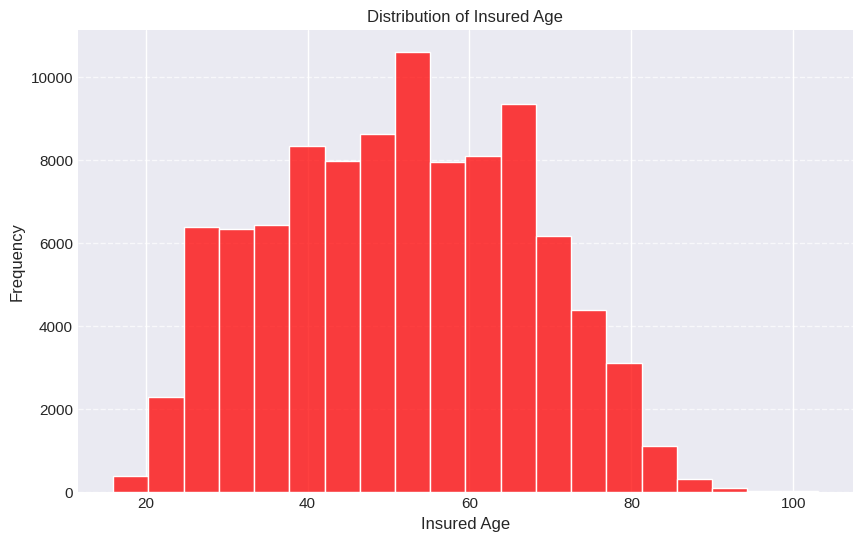

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the histogram with red color
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Insured.age', bins=20, color='red')
plt.title('Distribution of Insured Age')
plt.xlabel('Insured Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df

Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
1           182           44            0        3        0        1   
2           184           48            0        6        0        1   
3           183           71            1        6        0        3   
4           183           84            1       10        0        3   
5           365           35            1        8        1        1   
...         ...          ...          ...      ...      ...      ...   
99995       182           61            1       10        1        3   
99996       192           48            1        3        0        1   
99997       184           50            1        2        1        1   
99998       184           76            1        2        0        3   
99999       365           25            0        2        1        0   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
1               575       1            12427.42              20  ...   
2               847       1            12427.42              14  ...   
3               842       1             6213.71              43  ...   
4               856       1             6213.71              65  ...   
5               857       1            12427.42              18  ...   
...             ...     ...                 ...             ...  ...   
99995           824       1             6213.71              42  ...   
99996           850       1            12427.42              32  ...   
99997           650       0             6213.71              31  ...   
99998           811       0             6213.71              58  ...   
99999           818       0            12427.42               7  ...   

       NB_Claim  AMT_Claim  Lower_Threshold_Accel  Higher_Threshold_Accel  \
1             1  883.55484                     72                       3   
2             0    0.00000                     96                      22   
3             0    0.00000                     12                       0   
4             0    0.00000                     76                       0   
5             0    0.00000                     14                       0   
...         ...        ...                    ...                     ...   
99995         0    0.00000                     55                       1   
99996         0    0.00000                      4                       0   
99997         0    0.00000                     10                       2   
99998         0    0.00000                      8                       0   
99999         0    0.00000                      6                       0   

       Lower_Threshold_Brake  Higher_Threshold_Brake  \
1                         97                       2   
2                        176                      22   
3                         98                       0   
4                         30                       0   
5                         37                       0   
...                      ...                     ...   
99995                     22                       2   
99996                     28                       0   
99997                     20                       1   
99998                     41                       1   
99999                     52                       1   

       Low_Intensity_Left_Turns  High_Intensity_Left_Turns  \
1                           752                         35   
2                             0                          0   
3                             0                          0   
4                           104                          0   
5                          1223                         17   
...                         ...                        ...   
99995                        28                          0   
99996                       676                         27   
99997                         0                          0   
99998                         1                          0 

In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'NB_Claim', 'AMT_Claim', 'Lower_Threshold_Accel',
       'Higher_Threshold_Accel', 'Lower_Threshold_Brake',
       'Higher_Threshold_Brake', 'Low_Intensity_Left_Turns',
       'High_Intensity_Left_Turns', 'Low_Intensity_Right_Turns',
       'High_Intensity_Right_Turns'],
      dtype='object')

In [ ]:
desired_columns = list(df.columns.drop(['NB_Claim', 'AMT_Claim'])) + ['NB_Claim', 'AMT_Claim']
df = df.reindex(columns=desired_columns)

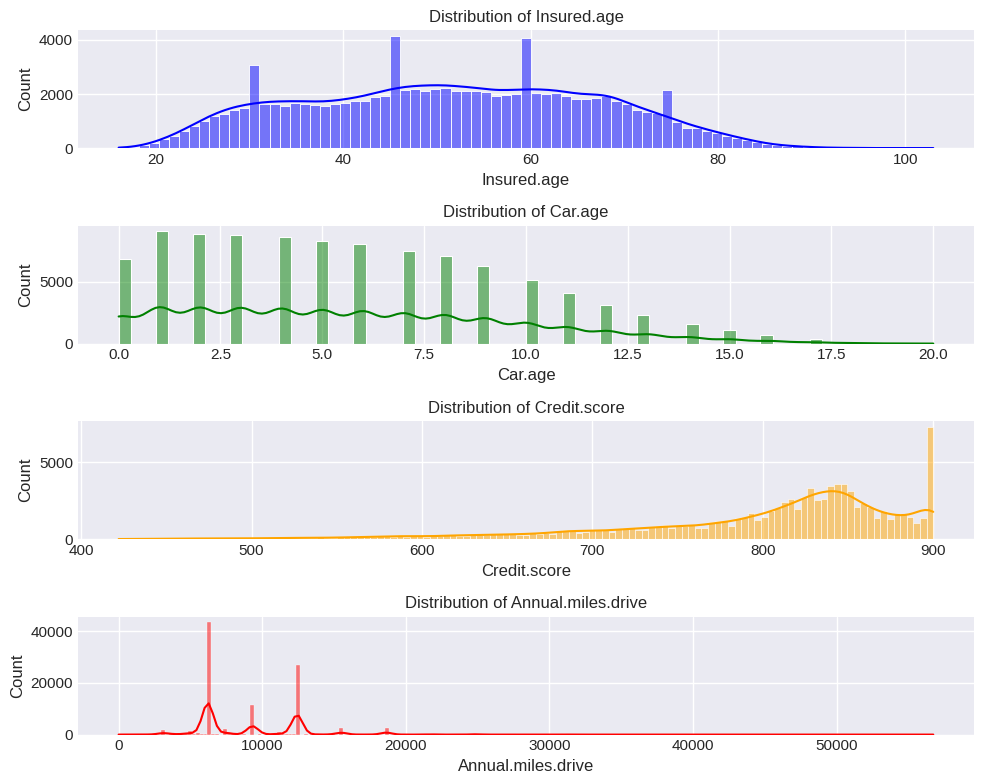

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = ['Insured.age', 'Car.age', 'Credit.score', 'Annual.miles.drive']

# Define colors for each feature
colors = ['blue', 'green', 'orange', 'red']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 8))

# Plot histograms and density plots using seaborn with different colors
for i, (feature, color) in enumerate(zip(numerical_features, colors)):
    sns.histplot(df[feature], kde=True, color=color, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

categorical_features = ['Insured.sex', 'Marital', 'Car.use', 'Region', 'Territory']

# Define colors for each category
colors = px.colors.qualitative.Pastel

# Plot bar plots for categorical features using Plotly with different colors
for i, feature in enumerate(categorical_features):
    fig = px.histogram(df, x=feature, title=f'Frequency of {feature}', color_discrete_sequence=[colors[i]])
    fig.show()



In [ ]:
import plotly.express as px

# Create scatter plot using Plotly
fig = px.scatter(df, x='Insured.age', y='Total.miles.driven', title='Insured Age vs Total Miles Driven')
fig.show()


In [ ]:
df

Duration  Insured.age  Insured.sex  Car.age  Marital  Car.use  \
1           182           44            0        3        0        1   
2           184           48            0        6        0        1   
3           183           71            1        6        0        3   
4           183           84            1       10        0        3   
5           365           35            1        8        1        1   
...         ...          ...          ...      ...      ...      ...   
99995       182           61            1       10        1        3   
99996       192           48            1        3        0        1   
99997       184           50            1        2        1        1   
99998       184           76            1        2        0        3   
99999       365           25            0        2        1        0   

       Credit.score  Region  Annual.miles.drive  Years.noclaims  ...  \
1               575       1            12427.42              20  ...   
2               847       1            12427.42              14  ...   
3               842       1             6213.71              43  ...   
4               856       1             6213.71              65  ...   
5               857       1            12427.42              18  ...   
...             ...     ...                 ...             ...  ...   
99995           824       1             6213.71              42  ...   
99996           850       1            12427.42              32  ...   
99997           650       0             6213.71              31  ...   
99998           811       0             6213.71              58  ...   
99999           818       0            12427.42               7  ...   

       Lower_Threshold_Accel  Higher_Threshold_Accel  Lower_Threshold_Brake  \
1                         72                       3                     97   
2                         96                      22                    176   
3                         12                       0                     98   
4                         76                       0                     30   
5                         14                       0                     37   
...                      ...                     ...                    ...   
99995                     55                       1                     22   
99996                      4                       0                     28   
99997                     10                       2                     20   
99998                      8                       0                     41   
99999                      6                       0                     52   

       Higher_Threshold_Brake  Low_Intensity_Left_Turns  \
1                           2                       752   
2                          22                         0   
3                           0                         0   
4                           0                       104   
5                           0                      1223   
...                       ...                       ...   
99995                       2                        28   
99996                       0                       676   
99997                       1                         0   
99998                       1                         1   
99999                       1                       150   

       High_Intensity_Left_Turns  Low_Intensity_Right_Turns  \
1                             35                       1933   
2                              0                          0   
3                              0                          0   
4                              0                        454   
5                             17                       1843   
...                          ...                        ...   
99995                          0                          8   
99996                         27                        580   
99997                          0                    

In [ ]:
X=['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Lower_Threshold_Accel', 'Higher_Threshold_Accel',
       'Lower_Threshold_Brake', 'Higher_Threshold_Brake',
       'Low_Intensity_Left_Turns', 'Low_Intensity_Right_Turns',
       'High_Intensity_Right_Turns', 'NB_Claim']

y= ['AMT_Claim']

In [ ]:
# X should be a DataFrame with column names, and y should be a Series
from sklearn.ensemble import RandomForestRegressor
X = pd.DataFrame(df, columns=['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Lower_Threshold_Accel', 'Higher_Threshold_Accel',
       'Lower_Threshold_Brake', 'Higher_Threshold_Brake',
       'Low_Intensity_Left_Turns', 'Low_Intensity_Right_Turns',
       'High_Intensity_Right_Turns', 'NB_Claim'])
y=pd.DataFrame(df,columns=['AMT_Claim'])

# Initializing the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Fitting the model to the data
model.fit(X, y)
# Getting feature importances
feature_importances = model.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
print(feature_importance_df)

<ipython-input-227-3106332dae77>:20: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



                       Feature  Importance
35                    NB_Claim    0.284878
30       Lower_Threshold_Brake    0.082191
6                 Credit.score    0.052314
28       Lower_Threshold_Accel    0.035055
17               Pct.drive.fri    0.033970
12          Total.miles.driven    0.031181
11           Annual.pct.driven    0.030867
25           Pct.drive.rush am    0.029186
14               Pct.drive.tue    0.027961
26           Pct.drive.rush pm    0.025230
1                  Insured.age    0.023982
21              Pct.drive.3hrs    0.022026
13               Pct.drive.mon    0.021887
9               Years.noclaims    0.021794
31      Higher_Threshold_Brake    0.021350
27                Avgdays.week    0.020186
29      Higher_Threshold_Accel    0.018614
32    Low_Intensity_Left_Turns    0.017754
19               Pct.drive.sun    0.017299
16               Pct.drive.thr    0.016933
15               Pct.drive.wed    0.016755
18               Pct.drive.sat    0.016587
20         

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': ['NB_Claim', 'Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel', 'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven', 'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm', 'Insured.age', 'Pct.drive.3hrs', 'Years.noclaims', 'Pct.drive.mon', 'Higher_Threshold_Brake', 'Avgdays.week', 'Higher_Threshold_Accel', 'Low_Intensity_Left_Turns', 'Pct.drive.sat', 'Pct.drive.thr', 'Pct.drive.wed', 'Pct.drive.sun', 'Low_Intensity_Right_Turns', 'Pct.drive.2hrs', 'Territory', 'Car.age', 'High_Intensity_Right_Turns', 'Annual.miles.drive', 'Pct.drive.wkday', 'Pct.drive.4hrs', 'Pct.drive.wkend', 'Duration', 'Insured.sex', 'Car.use', 'Marital', 'Region'],
    'Importance': [0.284842, 0.082793, 0.052524, 0.035698, 0.034780, 0.030614, 0.030498, 0.030008, 0.026812, 0.026121, 0.023622, 0.022244, 0.021852, 0.021733, 0.021620, 0.021039, 0.019237, 0.018094, 0.017338, 0.016855, 0.016264, 0.016001, 0.015268, 0.014841, 0.014272, 0.014239, 0.013498, 0.012534, 0.010677, 0.009783, 0.007950, 0.007023, 0.002693, 0.002644, 0.002235, 0.001756]
})

# Sort the DataFrame by Importance column in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = sorted_feature_importance.head(10)

print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
                 Feature  Importance
0               NB_Claim    0.284842
1  Lower_Threshold_Brake    0.082793
2           Credit.score    0.052524
3  Lower_Threshold_Accel    0.035698
4          Pct.drive.fri    0.034780
5     Total.miles.driven    0.030614
6      Annual.pct.driven    0.030498
7      Pct.drive.rush am    0.030008
8          Pct.drive.tue    0.026812
9      Pct.drive.rush pm    0.026121


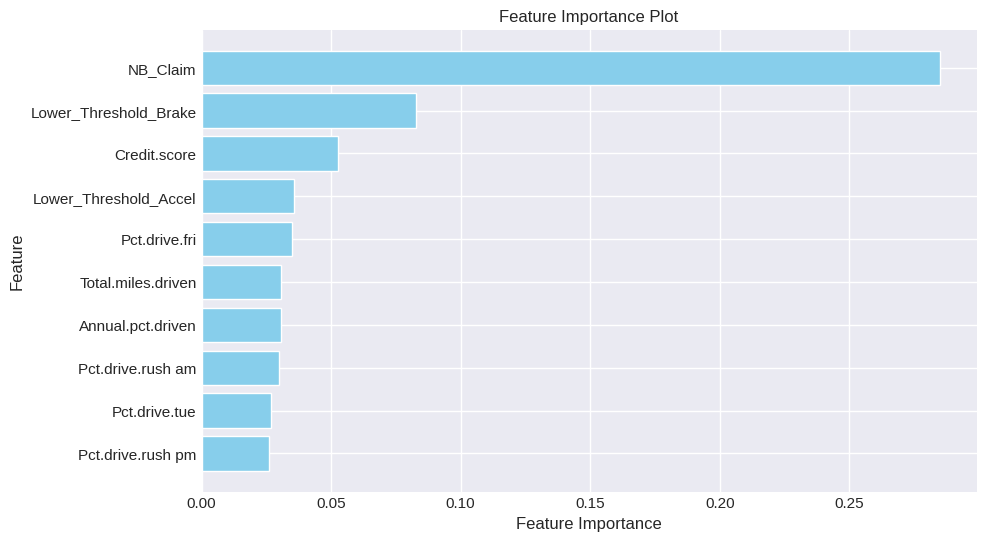

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'],top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature on top
plt.show()

In [ ]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Lower_Threshold_Accel', 'Higher_Threshold_Accel',
       'Lower_Threshold_Brake', 'Higher_Threshold_Brake',
       'Low_Intensity_Left_Turns', 'High_Intensity_Left_Turns',
       'Low_Intensity_Right_Turns', 'High_Intensity_Right_Turns', 'NB_Claim',
       'AMT_Claim'],
      dtype='object')

In [ ]:
class_counts = df['NB_Claim'].value_counts()
print(class_counts)

0    93689
1     3972
2      196
3       11
Name: NB_Claim, dtype: int64


In [ ]:
df1=df.copy()

In [ ]:
# Assuming train_df is your DataFrame containing the training data
df1 =  df[['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
                    'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
                    'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm','AMT_Claim','NB_Claim']]




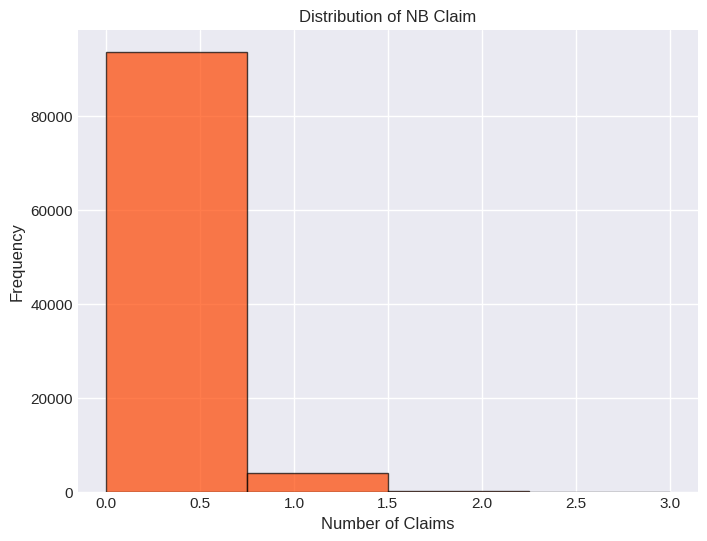

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of claim amount
plt.figure(figsize=(8, 6))
plt.hist(df1['NB_Claim'], bins=4, color='orangered', edgecolor='black', alpha=0.7)
plt.title('Distribution of NB Claim')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
df1.head()

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  Pct.drive.fri  \
1                     97           575                     72       0.159724   
2                    176           847                     96       0.168658   
3                     98           842                     12       0.253381   
4                     30           856                     76       0.182776   
5                     37           857                     14       0.161591   

   Total.miles.driven  Annual.pct.driven  Pct.drive.rush am  Pct.drive.tue  \
1         8092.308208           0.465753           0.150000       0.136917   
2         3225.832512           0.520548           0.040592       0.097124   
3          253.024528           0.065753           0.079259       0.056437   
4         4374.379634           0.441096           0.111583       0.169661   
5         4872.078772           0.520548           0.116971       0.154524   

   Pct.drive.rush pm  AMT_Claim  NB_Claim  
1           0.161883  883.55484         1  
2           0.131185    0.00000         0  
3           0.141112    0.00000         0  
4           0.058326    0.00000         0  
5           0.153723    0.00000         0

In [ ]:
df1 = df1.reset_index()

In [ ]:
df1

index  Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0          1                     97           575                     72   
1          2                    176           847                     96   
2          3                     98           842                     12   
3          4                     30           856                     76   
4          5                     37           857                     14   
...      ...                    ...           ...                    ...   
97863  99995                     22           824                     55   
97864  99996                     28           850                      4   
97865  99997                     20           650                     10   
97866  99998                     41           811                      8   
97867  99999                     52           818                      6   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.159724         8092.308208           0.465753   
1           0.168658         3225.832512           0.520548   
2           0.253381          253.024528           0.065753   
3           0.182776         4374.379634           0.441096   
4           0.161591         4872.078772           0.520548   
...              ...                 ...                ...   
97863       0.089213          903.231641           0.161644   
97864       0.155679         2870.045192           0.167123   
97865       0.167627          935.538222           0.117808   
97866       0.166981         4287.600459           0.473973   
97867       0.110993         6131.406302           0.421918   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  AMT_Claim  \
0               0.150000       0.136917           0.161883  883.55484   
1               0.040592       0.097124           0.131185    0.00000   
2               0.079259       0.056437           0.141112    0.00000   
3               0.111583       0.169661           0.058326    0.00000   
4               0.116971       0.154524           0.153723    0.00000   
...                  ...            ...                ...        ...   
97863           0.048544       0.110253           0.076794    0.00000   
97864           0.198293       0.124073           0.171707    0.00000   
97865           0.105594       0.076684           0.127840    0.00000   
97866           0.094729       0.151199           0.084729    0.00000   
97867           0.097965       0.220392           0.074646    0.00000   

       NB_Claim  
0             1  
1             0  
2             0  
3             0  
4             0  
...         ...  
97863         0  
97864         0  
97865         0  
97866         0  
97867         0  

[97868 rows x 12 columns]

<ipython-input-238-720aa9397163>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-238-720aa9397163>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='NB_Claim', ylabel='AMT_Claim'>

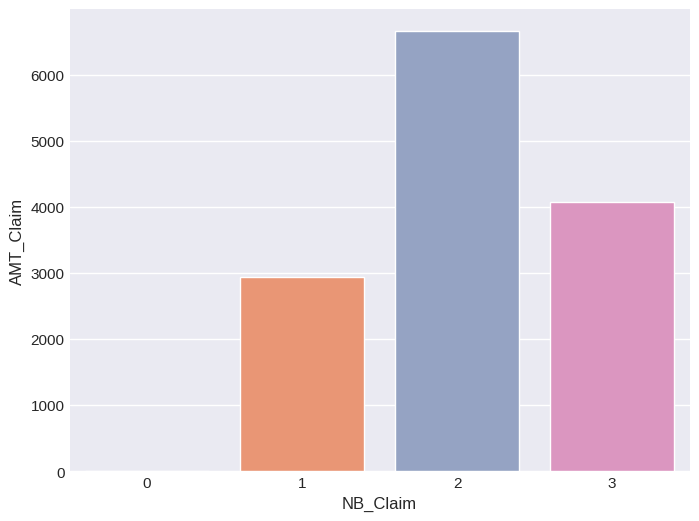

In [ ]:
import seaborn as sns

# Bar Plot: Average claim amount by NB_Claim
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='NB_Claim', y='AMT_Claim', ci=None, palette='Set2')


In [ ]:
subset_size = 100  # specify the size of the subset you want

sample = df1.sample(n=subset_size, random_state=42)

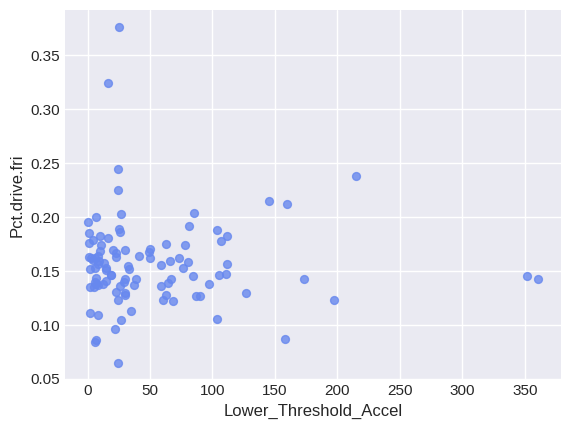

In [ ]:
# @title Lower_Threshold_Accel vs Pct.drive.fri

from matplotlib import pyplot as plt
sample.plot(kind='scatter', x='Lower_Threshold_Accel', y='Pct.drive.fri', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df1.columns

Index(['index', 'Lower_Threshold_Brake', 'Credit.score',
       'Lower_Threshold_Accel', 'Pct.drive.fri', 'Total.miles.driven',
       'Annual.pct.driven', 'Pct.drive.rush am', 'Pct.drive.tue',
       'Pct.drive.rush pm', 'AMT_Claim', 'NB_Claim'],
      dtype='object')

In [ ]:
df1 = df1.drop('index',axis = 1)

In [ ]:
df1

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                         97           575                     72   
1                        176           847                     96   
2                         98           842                     12   
3                         30           856                     76   
4                         37           857                     14   
...                      ...           ...                    ...   
97863                     22           824                     55   
97864                     28           850                      4   
97865                     20           650                     10   
97866                     41           811                      8   
97867                     52           818                      6   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.159724         8092.308208           0.465753   
1           0.168658         3225.832512           0.520548   
2           0.253381          253.024528           0.065753   
3           0.182776         4374.379634           0.441096   
4           0.161591         4872.078772           0.520548   
...              ...                 ...                ...   
97863       0.089213          903.231641           0.161644   
97864       0.155679         2870.045192           0.167123   
97865       0.167627          935.538222           0.117808   
97866       0.166981         4287.600459           0.473973   
97867       0.110993         6131.406302           0.421918   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  AMT_Claim  \
0               0.150000       0.136917           0.161883  883.55484   
1               0.040592       0.097124           0.131185    0.00000   
2               0.079259       0.056437           0.141112    0.00000   
3               0.111583       0.169661           0.058326    0.00000   
4               0.116971       0.154524           0.153723    0.00000   
...                  ...            ...                ...        ...   
97863           0.048544       0.110253           0.076794    0.00000   
97864           0.198293       0.124073           0.171707    0.00000   
97865           0.105594       0.076684           0.127840    0.00000   
97866           0.094729       0.151199           0.084729    0.00000   
97867           0.097965       0.220392           0.074646    0.00000   

       NB_Claim  
0             1  
1             0  
2             0  
3             0  
4             0  
...         ...  
97863         0  
97864         0  
97865         0  
97866         0  
97867         0  

[97868 rows x 11 columns]

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Separate features and target variable
X = df1.drop(columns=['NB_Claim'])  # Features
y = df1['NB_Claim']  # Target variable

# Define oversampling and undersampling strategies
over_sampling = SMOTE(sampling_strategy={1: 24467, 2: 24467, 3: 24467})
under_sampling = RandomUnderSampler(sampling_strategy={0: 24467})

# Define the resampling pipeline
resampling_pipeline = Pipeline(steps=[('over', over_sampling), ('under', under_sampling)])

# Apply resampling to the entire dataset
X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution after resampling: Counter({0: 24467, 1: 24467, 2: 24467, 3: 24467})


In [ ]:
df_resampled

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                        230           823                     39   
1                        385           802                    304   
2                         27           890                      5   
3                        146           514                    466   
4                         87           812                     17   
...                      ...           ...                    ...   
97863                     58           740                     40   
97864                    220           771                    133   
97865                    305           761                    189   
97866                    298           760                    185   
97867                    294           761                    183   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.138019         4243.320741           0.342466   
1           0.155666          590.896028           0.123288   
2           0.161987         1571.841273           0.778082   
3           0.190227          947.503805           0.328767   
4           0.152920         1451.399009           0.090411   
...              ...                 ...                ...   
97863       0.187823        27376.489941           0.834249   
97864       0.172603         9372.790179           0.876209   
97865       0.189926         7651.545710           0.925260   
97866       0.191096         8616.631653           0.923781   
97867       0.189657         8463.019040           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm    AMT_Claim  \
0               0.155380       0.152996           0.077259     0.000000   
1               0.141168       0.153800           0.123533     0.000000   
2               0.119942       0.207741           0.030022     0.000000   
3               0.009230       0.043756           0.179121     0.000000   
4               0.131098       0.188662           0.059880     0.000000   
...                  ...            ...                ...          ...   
97863           0.153574       0.176213           0.055712  4118.986575   
97864           0.122116       0.130107           0.131751  3970.262794   
97865           0.074167       0.127404           0.129800  3177.782790   
97866           0.075006       0.129907           0.125550  3073.215122   
97867           0.077871       0.129395           0.126841  2706.402067   

       NB_Claim  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
97863         3  
97864         3  
97865         3  
97866         3  
97867         3  

[97868 rows x 11 columns]

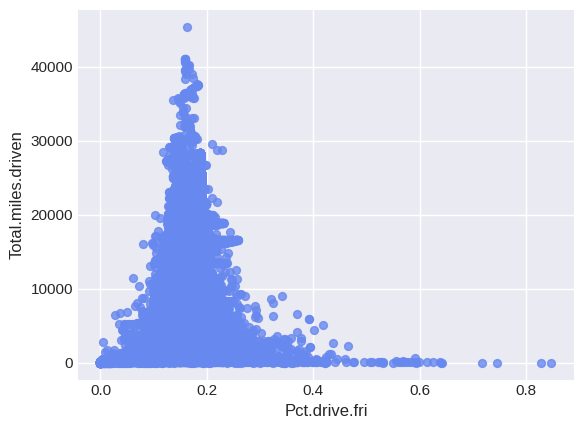

In [ ]:
# @title Pct.drive.fri vs Total.miles.driven

from matplotlib import pyplot as plt
df_resampled.plot(kind='scatter', x='Pct.drive.fri', y='Total.miles.driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
class_counts = df_resampled['NB_Claim'].value_counts()
print(class_counts)

0    24467
1    24467
2    24467
3    24467
Name: NB_Claim, dtype: int64


In [ ]:
# Calculate average claim amount for each class
average_claim_amount = df_resampled.groupby('NB_Claim')['AMT_Claim'].mean()

# Print the average claim amount for each class
print("Average claim amount for each class:")
print(average_claim_amount)


Average claim amount for each class:
NB_Claim
0       0.000000
1    2944.503817
2    6652.469940
3    3842.696369
Name: AMT_Claim, dtype: float64


In [ ]:
df_resampled

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                        230           823                     39   
1                        385           802                    304   
2                         27           890                      5   
3                        146           514                    466   
4                         87           812                     17   
...                      ...           ...                    ...   
97863                     58           740                     40   
97864                    220           771                    133   
97865                    305           761                    189   
97866                    298           760                    185   
97867                    294           761                    183   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.138019         4243.320741           0.342466   
1           0.155666          590.896028           0.123288   
2           0.161987         1571.841273           0.778082   
3           0.190227          947.503805           0.328767   
4           0.152920         1451.399009           0.090411   
...              ...                 ...                ...   
97863       0.187823        27376.489941           0.834249   
97864       0.172603         9372.790179           0.876209   
97865       0.189926         7651.545710           0.925260   
97866       0.191096         8616.631653           0.923781   
97867       0.189657         8463.019040           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm    AMT_Claim  \
0               0.155380       0.152996           0.077259     0.000000   
1               0.141168       0.153800           0.123533     0.000000   
2               0.119942       0.207741           0.030022     0.000000   
3               0.009230       0.043756           0.179121     0.000000   
4               0.131098       0.188662           0.059880     0.000000   
...                  ...            ...                ...          ...   
97863           0.153574       0.176213           0.055712  4118.986575   
97864           0.122116       0.130107           0.131751  3970.262794   
97865           0.074167       0.127404           0.129800  3177.782790   
97866           0.075006       0.129907           0.125550  3073.215122   
97867           0.077871       0.129395           0.126841  2706.402067   

       NB_Claim  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
97863         3  
97864         3  
97865         3  
97866         3  
97867         3  

[97868 rows x 11 columns]

In [ ]:
df_resampled.columns

Index(['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
       'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
       'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm', 'AMT_Claim',
       'NB_Claim'],
      dtype='object')

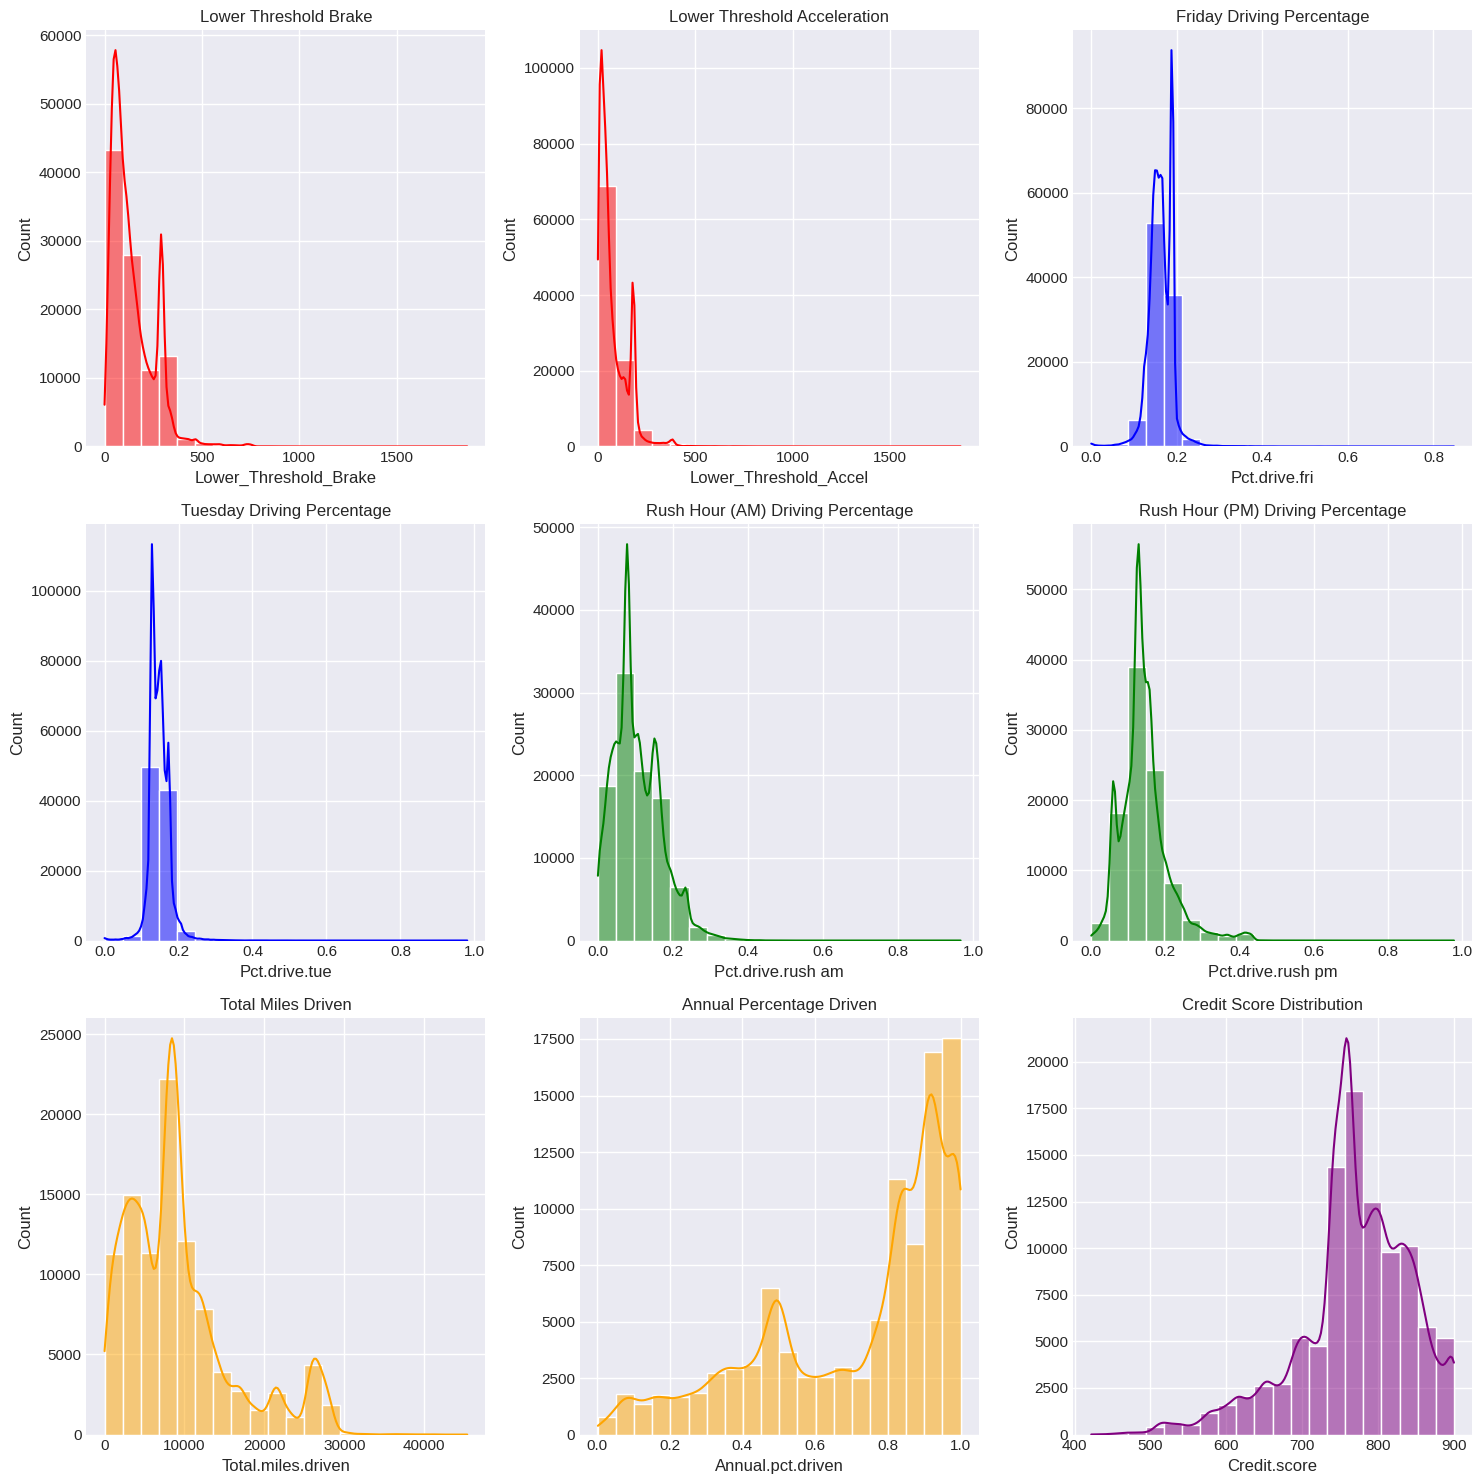

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Plot histograms for Lower_Threshold_Brake and Lower_Threshold_Accel
sns.histplot(df_resampled['Lower_Threshold_Brake'], bins=20, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title('Lower Threshold Brake')

sns.histplot(df_resampled['Lower_Threshold_Accel'], bins=20, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Lower Threshold Acceleration')

# Plot driving percentages on different days
sns.histplot(df_resampled['Pct.drive.fri'], bins=20, kde=True, color='blue', ax=axes[0, 2])
axes[0, 2].set_title('Friday Driving Percentage')

sns.histplot(df_resampled['Pct.drive.tue'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Tuesday Driving Percentage')

# Plot driving percentages during rush hours
sns.histplot(df_resampled['Pct.drive.rush am'], bins=20, kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Rush Hour (AM) Driving Percentage')

sns.histplot(df_resampled['Pct.drive.rush pm'], bins=20, kde=True, color='green', ax=axes[1, 2])
axes[1, 2].set_title('Rush Hour (PM) Driving Percentage')

# Plot total miles driven and annual percentage driven
sns.histplot(df_resampled['Total.miles.driven'], bins=20, kde=True, color='orange', ax=axes[2, 0])
axes[2, 0].set_title('Total Miles Driven')

sns.histplot(df_resampled['Annual.pct.driven'], bins=20, kde=True, color='orange', ax=axes[2, 1])
axes[2, 1].set_title('Annual Percentage Driven')

# Plot credit score distribution
sns.histplot(df_resampled['Credit.score'], bins=20, kde=True, color='purple', ax=axes[2, 2])
axes[2, 2].set_title('Credit Score Distribution')

# Remove spines from all subplots
for ax in axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define thresholds for each feature
thresholds = {
    'Lower_Threshold_Brake': 50,  # Example threshold for brake threshold
    'Credit.score': 700,          # Example threshold for credit score
    # Define thresholds for other features as needed
}

# Classify drivers based on thresholds
df_resampled['Driving_Class'] = 'Unknown'
for feature, threshold in thresholds.items():
    # Update driving class based on feature values
    df_resampled.loc[df_resampled[feature] <= threshold, 'Driving_Class'] = 'Good'
    df_resampled.loc[df_resampled[feature] > threshold, 'Driving_Class'] = 'Bad'

# Print classification summary
print(df_resampled['Driving_Class'].value_counts())


Bad     82706
Good    15162
Name: Driving_Class, dtype: int64


In [ ]:
# Define thresholds for each feature
thresholds = {
    'Lower_Threshold_Brake': 50,  # Example threshold for brake threshold
    'Credit.score': 700,          # Example threshold for credit score
    # Define thresholds for other features as needed
}

# Classify drivers based on thresholds
df1['Driving_Class'] = 'Unknown'
for feature, threshold in thresholds.items():
    # Update driving class based on feature values
    df1.loc[df1[feature] <= threshold, 'Driving_Class'] = 'Good'
    df1.loc[df1[feature] > threshold, 'Driving_Class'] = 'Bad'

# Print classification summary
print(df1['Driving_Class'].value_counts())


Bad     85595
Good    12273
Name: Driving_Class, dtype: int64


In [ ]:
df_resampled['Driving_Class']

0         Bad
1         Bad
2         Bad
3        Good
4         Bad
         ... 
97863     Bad
97864     Bad
97865     Bad
97866     Bad
97867     Bad
Name: Driving_Class, Length: 97868, dtype: object

In [ ]:
df_resampled.head(5)

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  Pct.drive.fri  \
0                    230           823                     39       0.138019   
1                    385           802                    304       0.155666   
2                     27           890                      5       0.161987   
3                    146           514                    466       0.190227   
4                     87           812                     17       0.152920   

   Total.miles.driven  Annual.pct.driven  Pct.drive.rush am  Pct.drive.tue  \
0         4243.320741           0.342466           0.155380       0.152996   
1          590.896028           0.123288           0.141168       0.153800   
2         1571.841273           0.778082           0.119942       0.207741   
3          947.503805           0.328767           0.009230       0.043756   
4         1451.399009           0.090411           0.131098       0.188662   

   Pct.drive.rush pm  AMT_Claim  NB_Claim Driving_Class  
0           0.077259        0.0         0           Bad  
1           0.123533        0.0         0           Bad  
2           0.030022        0.0         0           Bad  
3           0.179121        0.0         0          Good  
4           0.059880        0.0         0           Bad

In [ ]:
df_resampled

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                        230           823                     39   
1                        385           802                    304   
2                         27           890                      5   
3                        146           514                    466   
4                         87           812                     17   
...                      ...           ...                    ...   
97863                     58           740                     40   
97864                    220           771                    133   
97865                    305           761                    189   
97866                    298           760                    185   
97867                    294           761                    183   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.138019         4243.320741           0.342466   
1           0.155666          590.896028           0.123288   
2           0.161987         1571.841273           0.778082   
3           0.190227          947.503805           0.328767   
4           0.152920         1451.399009           0.090411   
...              ...                 ...                ...   
97863       0.187823        27376.489941           0.834249   
97864       0.172603         9372.790179           0.876209   
97865       0.189926         7651.545710           0.925260   
97866       0.191096         8616.631653           0.923781   
97867       0.189657         8463.019040           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm    AMT_Claim  \
0               0.155380       0.152996           0.077259     0.000000   
1               0.141168       0.153800           0.123533     0.000000   
2               0.119942       0.207741           0.030022     0.000000   
3               0.009230       0.043756           0.179121     0.000000   
4               0.131098       0.188662           0.059880     0.000000   
...                  ...            ...                ...          ...   
97863           0.153574       0.176213           0.055712  4118.986575   
97864           0.122116       0.130107           0.131751  3970.262794   
97865           0.074167       0.127404           0.129800  3177.782790   
97866           0.075006       0.129907           0.125550  3073.215122   
97867           0.077871       0.129395           0.126841  2706.402067   

       NB_Claim Driving_Class  
0             0           Bad  
1             0           Bad  
2             0           Bad  
3             0          Good  
4             0           Bad  
...         ...           ...  
97863         3           Bad  
97864         3           Bad  
97865         3           Bad  
97866         3           Bad  
97867         3           Bad  

[97868 rows x 12 columns]

<ipython-input-258-d2be81eb7127>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-258-d2be81eb7127>:11: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



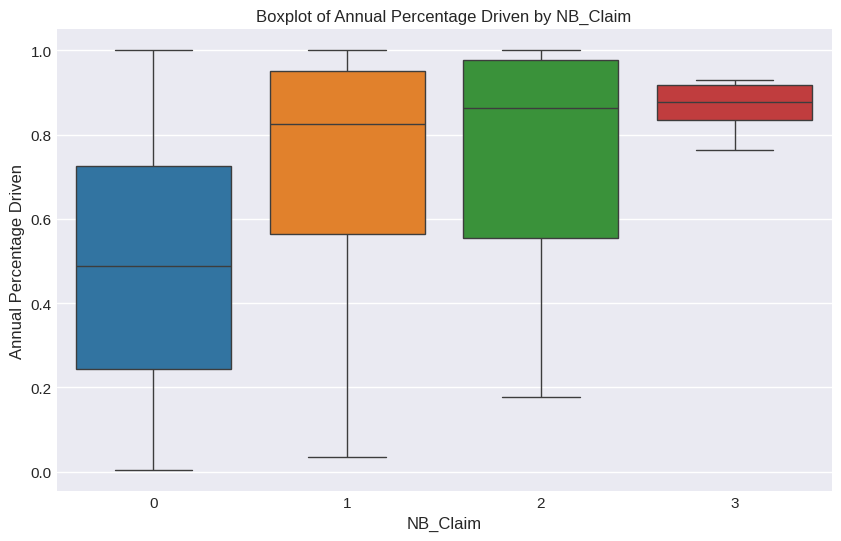

In [ ]:
# @title Annual Driving Percentage vs. Number of Claims

import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the boxplot with the custom color palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='NB_Claim', y='Annual.pct.driven', data=df_resampled, palette=custom_palette)
plt.title('Boxplot of Annual Percentage Driven by NB_Claim')
plt.xlabel('NB_Claim')
plt.ylabel('Annual Percentage Driven')
plt.show()


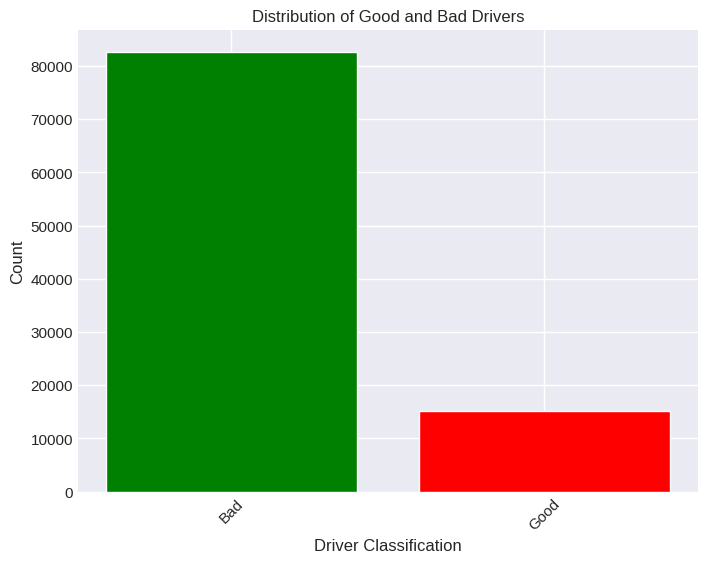

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Driving_Class' column contains the classification (Good/Bad)
driving_class_counts = df_resampled['Driving_Class'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.bar(driving_class_counts.index, driving_class_counts.values, color=['green', 'red'])
plt.title('Distribution of Good and Bad Drivers')
plt.xlabel('Driver Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_resampled = df_resampled[['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
       'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
       'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm','NB_Claim','AMT_Claim']]

In [ ]:
df1 = df1[['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
       'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
       'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm','NB_Claim','AMT_Claim']]


In [ ]:
df_resampled.head(5)

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  Pct.drive.fri  \
0                    230           823                     39       0.138019   
1                    385           802                    304       0.155666   
2                     27           890                      5       0.161987   
3                    146           514                    466       0.190227   
4                     87           812                     17       0.152920   

   Total.miles.driven  Annual.pct.driven  Pct.drive.rush am  Pct.drive.tue  \
0         4243.320741           0.342466           0.155380       0.152996   
1          590.896028           0.123288           0.141168       0.153800   
2         1571.841273           0.778082           0.119942       0.207741   
3          947.503805           0.328767           0.009230       0.043756   
4         1451.399009           0.090411           0.131098       0.188662   

   Pct.drive.rush pm  NB_Claim  AMT_Claim  
0           0.077259         0        0.0  
1           0.123533         0        0.0  
2           0.030022         0        0.0  
3           0.179121         0        0.0  
4           0.059880         0        0.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to be scaled
columns_to_scale = ['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel', 'Pct.drive.fri', 'Total.miles.driven']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_resampled_scaled = df_resampled.copy()  # Make a copy of the dataframe
df_resampled_scaled[columns_to_scale] = scaler.fit_transform(df_resampled_scaled[columns_to_scale])

df1_scaled = df1.copy()  # Make a copy of the dataframe
df1_scaled[columns_to_scale] = scaler.fit_transform(df1_scaled[columns_to_scale])


In [ ]:
df_resampled_scaled

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                   0.123457      0.838912               0.020934   
1                   0.206656      0.794979               0.163178   
2                   0.014493      0.979079               0.002684   
3                   0.078368      0.192469               0.250134   
4                   0.046699      0.815900               0.009125   
...                      ...           ...                    ...   
97863               0.031133      0.665272               0.021471   
97864               0.118089      0.730126               0.071390   
97865               0.163714      0.709205               0.101449   
97866               0.159957      0.707113               0.099302   
97867               0.157810      0.709205               0.098229   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.162775            0.093536           0.342466   
1           0.183587            0.013023           0.123288   
2           0.191041            0.034646           0.778082   
3           0.224346            0.020884           0.328767   
4           0.180347            0.031991           0.090411   
...              ...                 ...                ...   
97863       0.221511            0.603476           0.834249   
97864       0.203561            0.206608           0.876209   
97865       0.223992            0.168665           0.925260   
97866       0.225371            0.189940           0.923781   
97867       0.223674            0.186553           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  NB_Claim  \
0               0.155380       0.152996           0.077259         0   
1               0.141168       0.153800           0.123533         0   
2               0.119942       0.207741           0.030022         0   
3               0.009230       0.043756           0.179121         0   
4               0.131098       0.188662           0.059880         0   
...                  ...            ...                ...       ...   
97863           0.153574       0.176213           0.055712         3   
97864           0.122116       0.130107           0.131751         3   
97865           0.074167       0.127404           0.129800         3   
97866           0.075006       0.129907           0.125550         3   
97867           0.077871       0.129395           0.126841         3   

         AMT_Claim  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
97863  4118.986575  
97864  3970.262794  
97865  3177.782790  
97866  3073.215122  
97867  2706.402067  

[97868 rows x 11 columns]

In [ ]:
df1_scaled

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                   0.052067      0.320084               0.038647   
1                   0.094471      0.889121               0.051530   
2                   0.052603      0.878661               0.006441   
3                   0.016103      0.907950               0.040794   
4                   0.019860      0.910042               0.007515   
...                      ...           ...                    ...   
97863               0.011809      0.841004               0.029522   
97864               0.015030      0.895397               0.002147   
97865               0.010735      0.476987               0.005368   
97866               0.022008      0.813808               0.004294   
97867               0.027912      0.828452               0.003221   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.159945            0.171146           0.465753   
1           0.168892            0.068223           0.520548   
2           0.253732            0.005349           0.065753   
3           0.183029            0.092514           0.441096   
4           0.161815            0.103040           0.520548   
...              ...                 ...                ...   
97863       0.089336            0.019101           0.161644   
97864       0.155894            0.060698           0.167123   
97865       0.167859            0.019784           0.117808   
97866       0.167213            0.090678           0.473973   
97867       0.111147            0.129674           0.421918   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  NB_Claim  \
0               0.150000       0.136917           0.161883         1   
1               0.040592       0.097124           0.131185         0   
2               0.079259       0.056437           0.141112         0   
3               0.111583       0.169661           0.058326         0   
4               0.116971       0.154524           0.153723         0   
...                  ...            ...                ...       ...   
97863           0.048544       0.110253           0.076794         0   
97864           0.198293       0.124073           0.171707         0   
97865           0.105594       0.076684           0.127840         0   
97866           0.094729       0.151199           0.084729         0   
97867           0.097965       0.220392           0.074646         0   

       AMT_Claim  
0      883.55484  
1        0.00000  
2        0.00000  
3        0.00000  
4        0.00000  
...          ...  
97863    0.00000  
97864    0.00000  
97865    0.00000  
97866    0.00000  
97867    0.00000  

[97868 rows x 11 columns]

In [ ]:
mean_claim_amount = df_resampled_scaled['AMT_Claim'].mean()

print("Mean Claim Amount:", mean_claim_amount)

Mean Claim Amount: 3359.917531417709


In [ ]:
cols = list(df_resampled_scaled.columns)

In [ ]:
df_resampled.columns

Index(['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
       'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
       'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm', 'NB_Claim',
       'AMT_Claim'],
      dtype='object')

# Outlier Visualization

<ipython-input-269-0b842360d8b0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-269-0b842360d8b0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-269-0b842360d8b0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-269-0b842360d8b0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-269-0b842360d8b0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated a

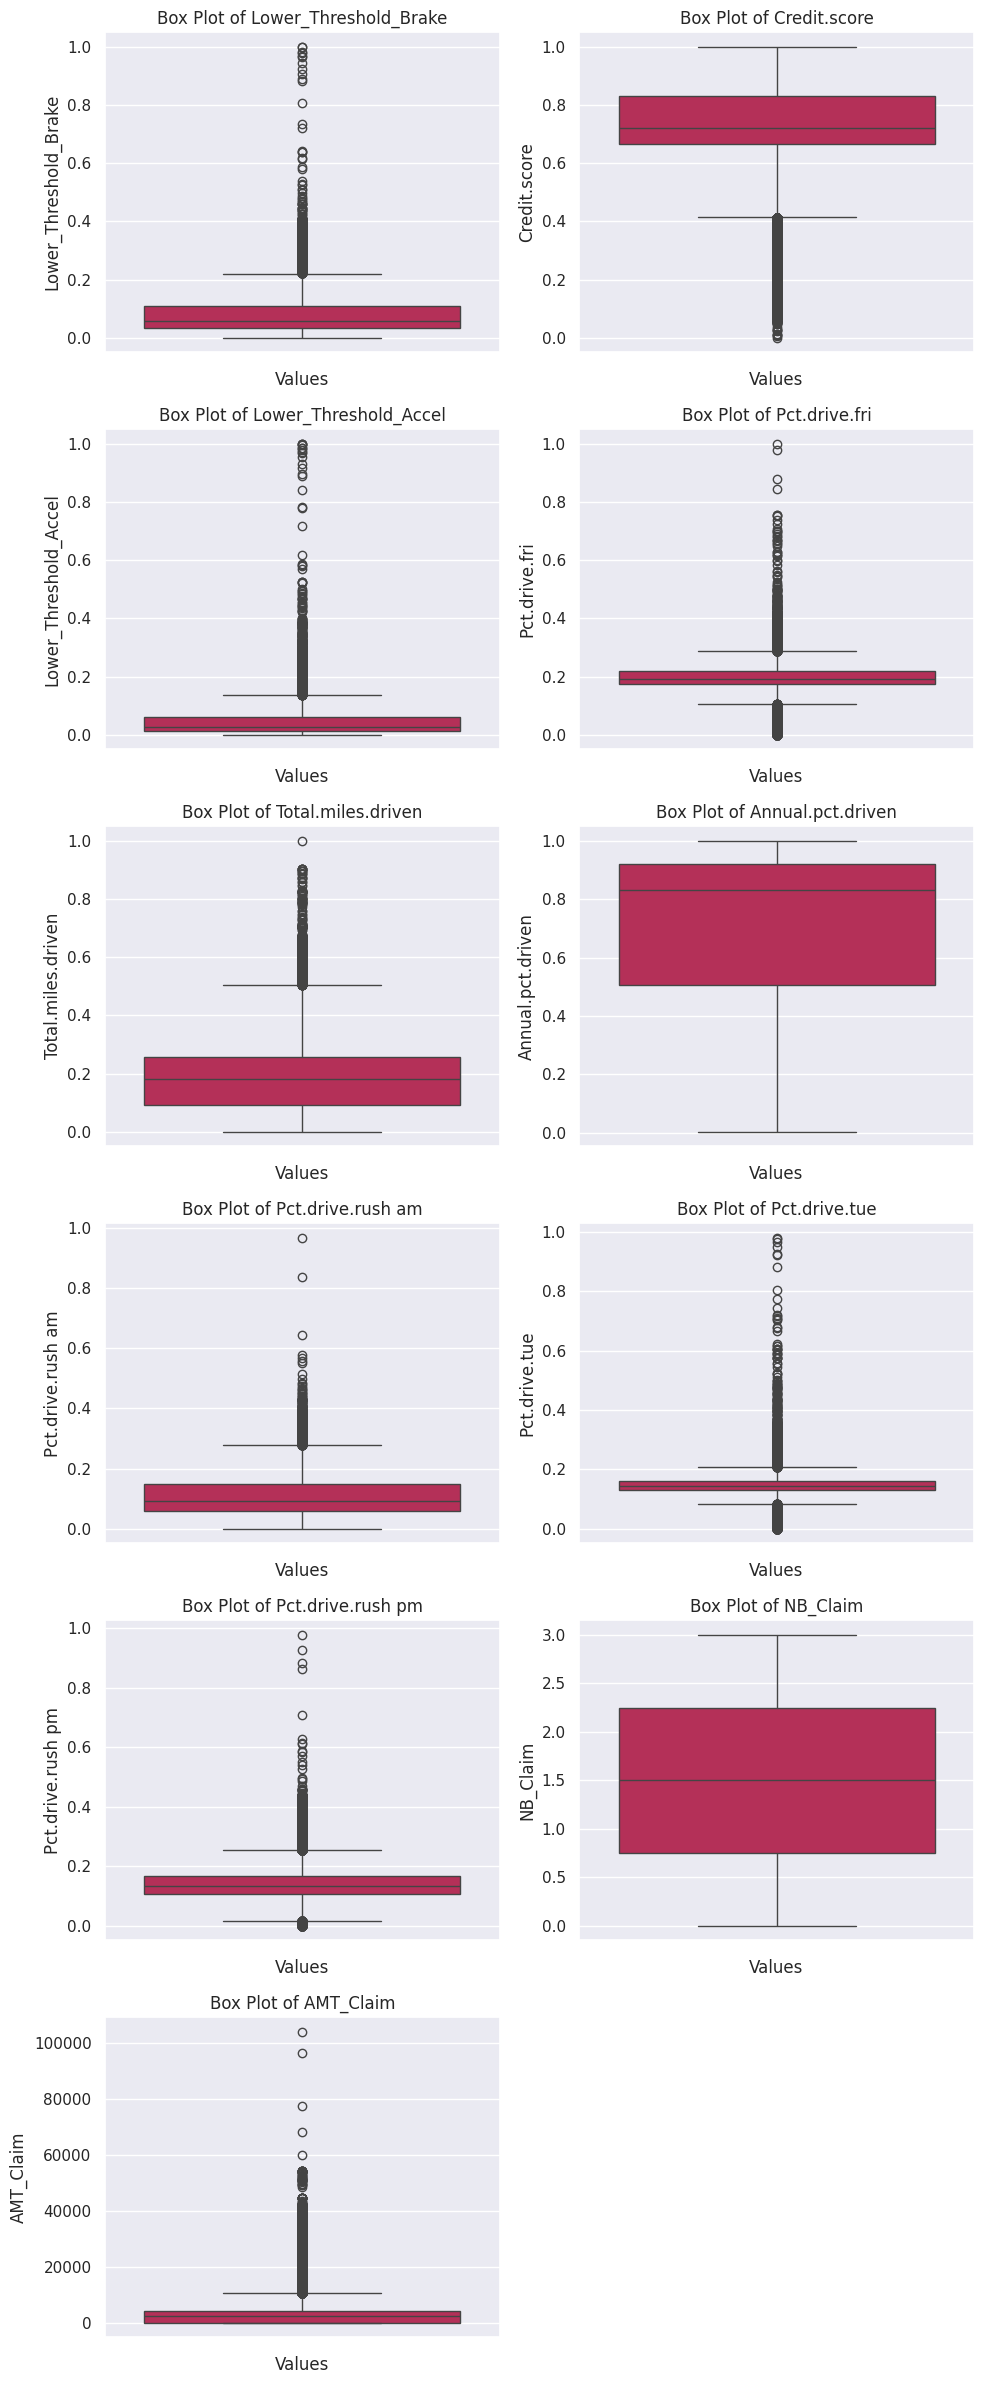

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(palette="coolwarm")

# Calculate the number of rows and columns for subplots
num_cols = len(cols)
num_rows = num_cols // 2 + num_cols % 2  # Ensure odd number of rows for odd number of columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 4
                                                          * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and create a horizontal box plot
for i, column_name in enumerate(cols):
    # Create a box plot of the column
    sns.boxplot(y=df_resampled_scaled[column_name], ax=axes[i], palette="rocket_r")

    # Set the title and axis labels
    axes[i].set_title('Box Plot of {}'.format(column_name))
    axes[i].set_ylabel(column_name)
    axes[i].set_xlabel('Values')

# Hide empty subplots if the number of plots is odd
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
# Define a function to remove outliers using Z-score
def remove_outliers(df_resampled_scaled, columns):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df_resampled_scaled.copy()

    for column in columns:
        # Calculate Z-score for each value in the column
        z_scores = np.abs(df_resampled_scaled[column] - df_resampled_scaled[column].mean()) / df_resampled_scaled[column].std()

        # Mark outliers where Z-score is greater than 3
        outliers = df_cleaned[z_scores > 3]

        # Remove outliers from the DataFrame
        df_cleaned.drop(outliers.index, inplace=True)

    return df_cleaned

# Specify the columns to check for outliers
columns_to_check = ['AMT_Claim',
                   'Lower_Threshold_Brake',
                   'Credit.score',
                   'Lower_Threshold_Accel',
                   'Pct.drive.fri',
                   'Total.miles.driven',
                   'Pct.drive.rush am',
                   'Pct.drive.tue',
                   'Pct.drive.rush pm']

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df_resampled_scaled, columns_to_check)
df1_cleaned = remove_outliers(df1_scaled, columns_to_check)

# Print the modified DataFrame


<ipython-input-270-2fb44a485147>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_cleaned

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                   0.123457      0.838912               0.020934   
1                   0.206656      0.794979               0.163178   
2                   0.014493      0.979079               0.002684   
4                   0.046699      0.815900               0.009125   
5                   0.009125      0.694561               0.000537   
...                      ...           ...                    ...   
97863               0.031133      0.665272               0.021471   
97864               0.118089      0.730126               0.071390   
97865               0.163714      0.709205               0.101449   
97866               0.159957      0.707113               0.099302   
97867               0.157810      0.709205               0.098229   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.162775            0.093536           0.342466   
1           0.183587            0.013023           0.123288   
2           0.191041            0.034646           0.778082   
4           0.180347            0.031991           0.090411   
5           0.125862            0.012491           0.098630   
...              ...                 ...                ...   
97863       0.221511            0.603476           0.834249   
97864       0.203561            0.206608           0.876209   
97865       0.223992            0.168665           0.925260   
97866       0.225371            0.189940           0.923781   
97867       0.223674            0.186553           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  NB_Claim  \
0               0.155380       0.152996           0.077259         0   
1               0.141168       0.153800           0.123533         0   
2               0.119942       0.207741           0.030022         0   
4               0.131098       0.188662           0.059880         0   
5               0.048163       0.154846           0.047808         0   
...                  ...            ...                ...       ...   
97863           0.153574       0.176213           0.055712         3   
97864           0.122116       0.130107           0.131751         3   
97865           0.074167       0.127404           0.129800         3   
97866           0.075006       0.129907           0.125550         3   
97867           0.077871       0.129395           0.126841         3   

         AMT_Claim  
0         0.000000  
1         0.000000  
2         0.000000  
4         0.000000  
5         0.000000  
...            ...  
97863  4118.986575  
97864  3970.262794  
97865  3177.782790  
97866  3073.215122  
97867  2706.402067  

[88644 rows x 11 columns]

<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




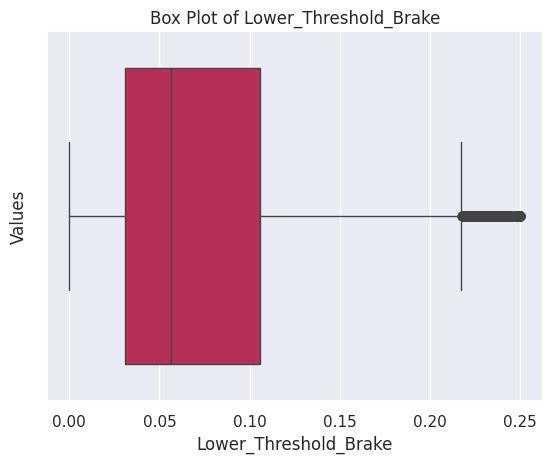

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




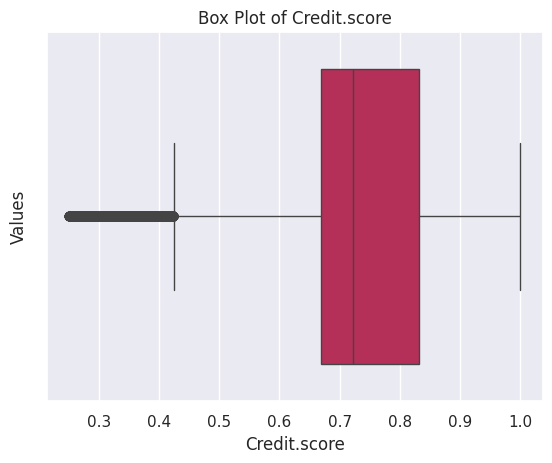

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




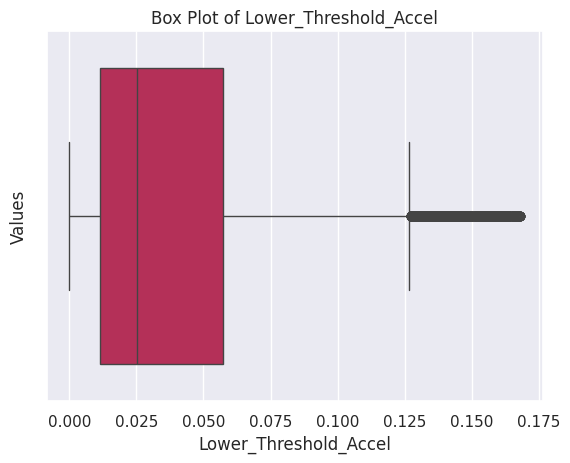

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




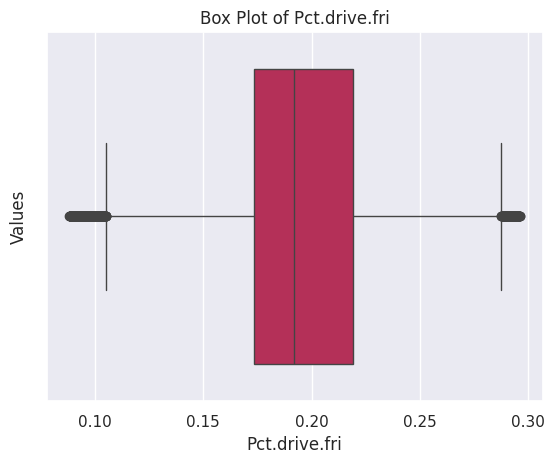

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




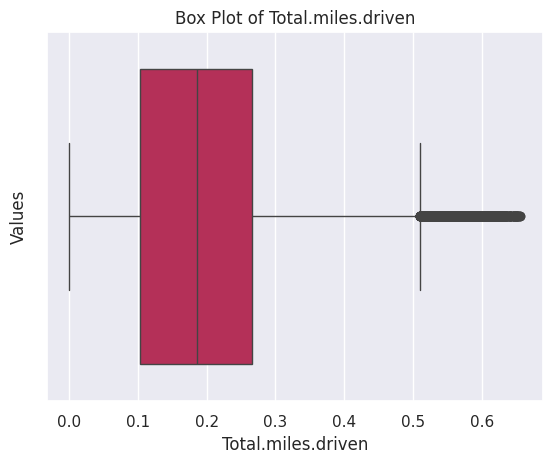

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




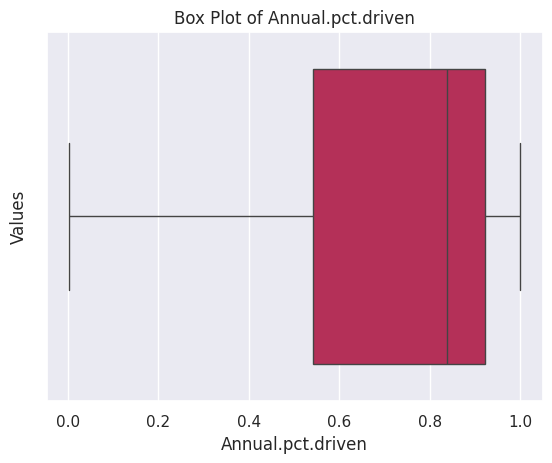

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




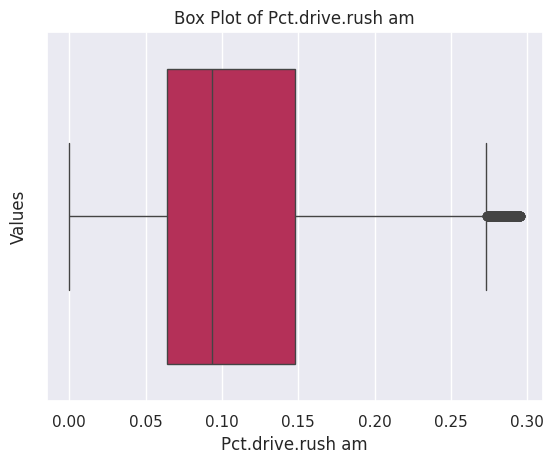

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




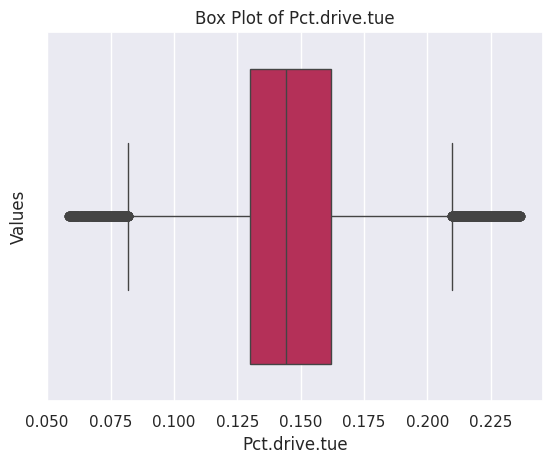

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




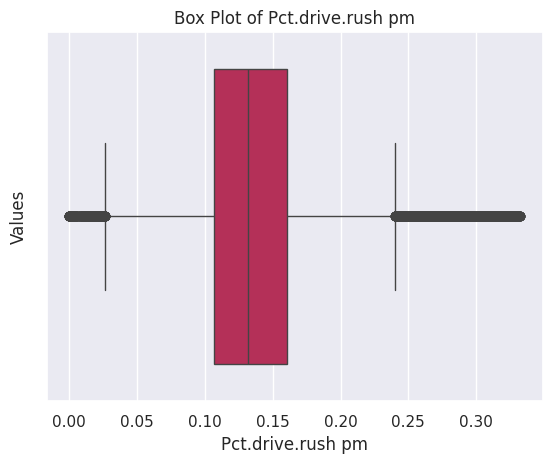

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




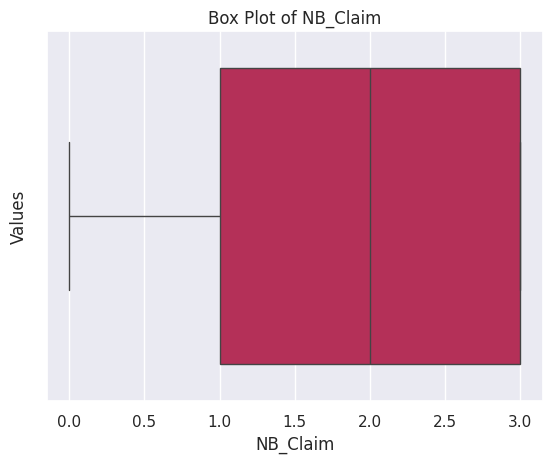

------------------------------------------------------


<ipython-input-272-a878fd4840eb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




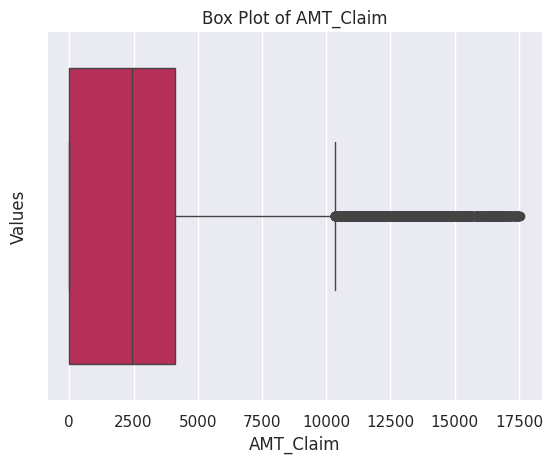

------------------------------------------------------


In [ ]:
import seaborn as sns

sns.set(palette="coolwarm")

for column_name in list(cols):
    # Create a box plot of the column
    fig, ax = plt.subplots()
    ax = sns.boxplot(x=df_cleaned[column_name], palette="rocket_r")

    # Set the title and axis labels
    ax.set_title('Box Plot of {}'.format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('Values')

    # Show the plot
    plt.show()
    print("------------------------------------------------------")

<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




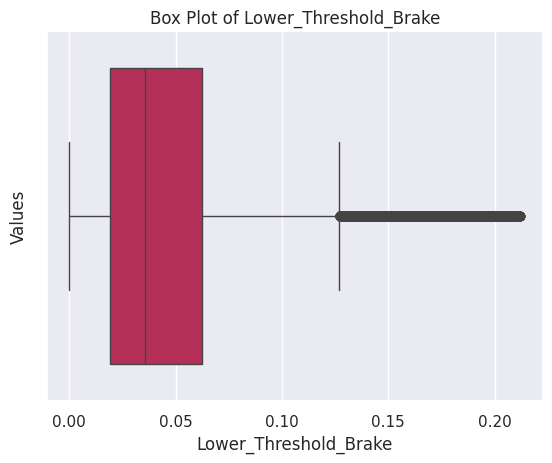

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




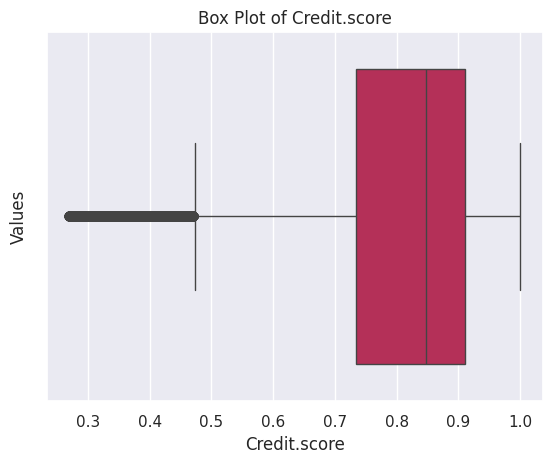

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




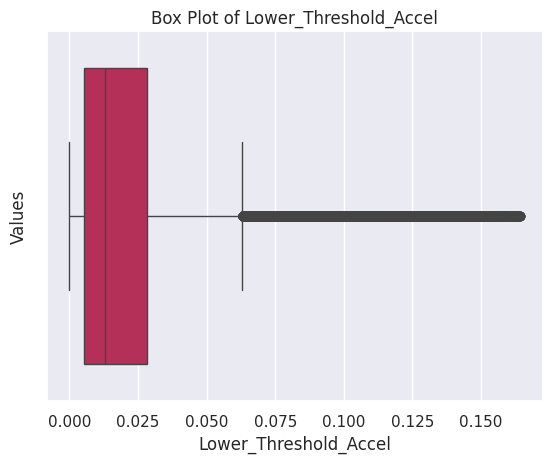

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




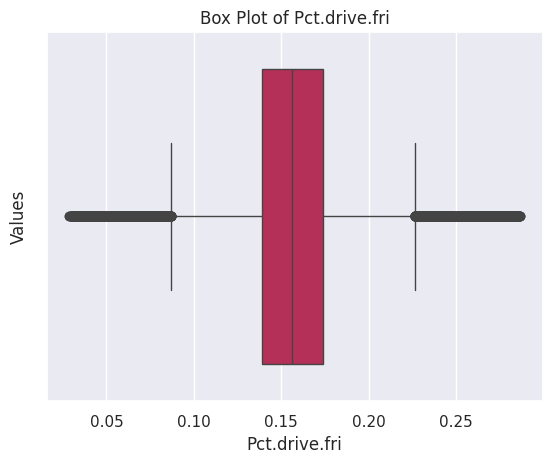

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




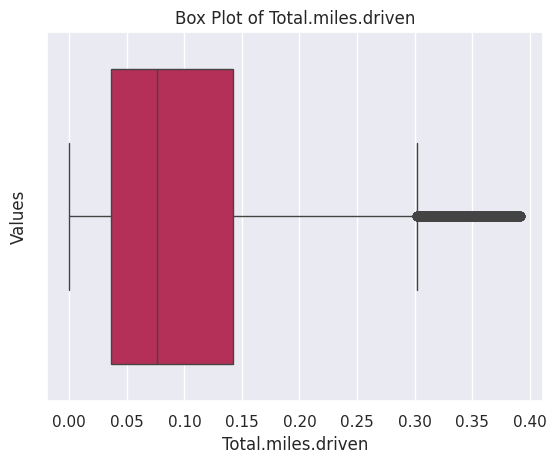

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




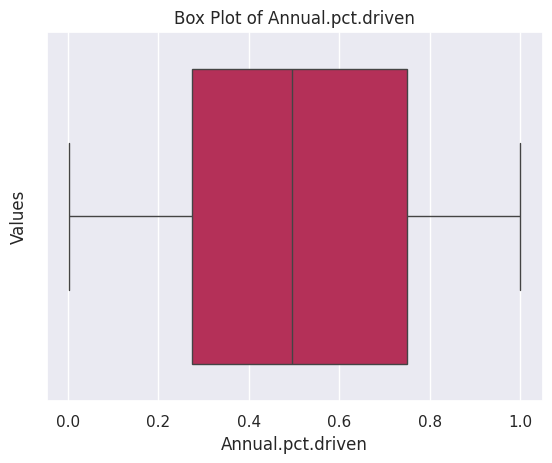

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




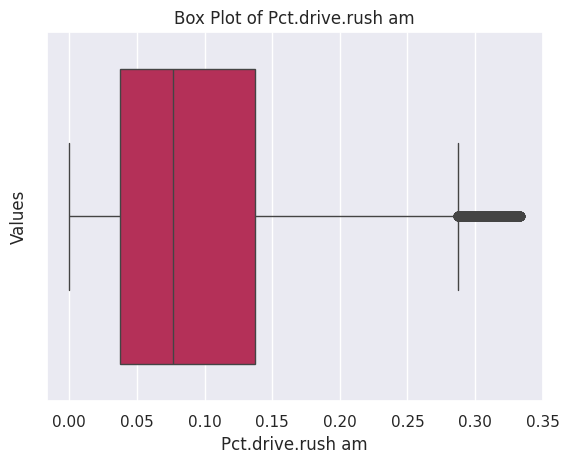

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




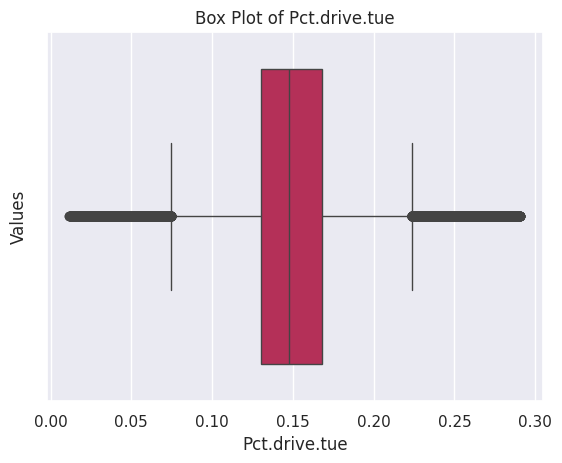

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




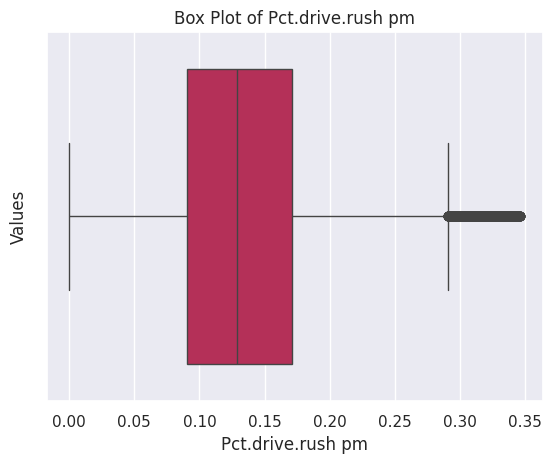

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




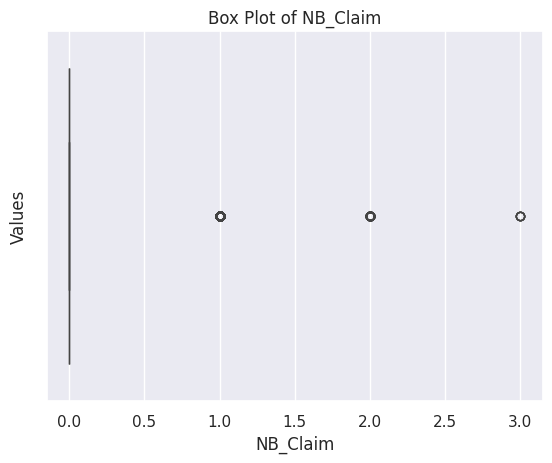

------------------------------------------------------


<ipython-input-273-310f198b0372>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




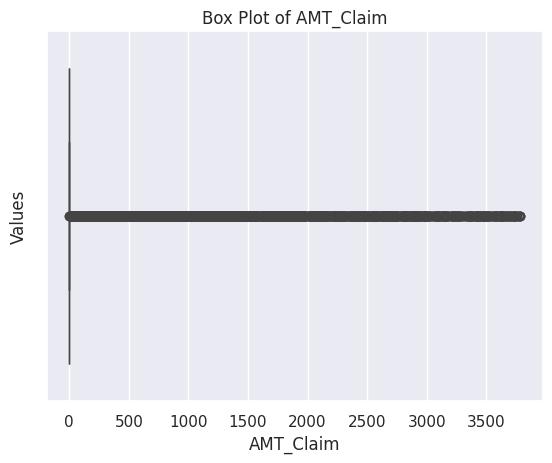

------------------------------------------------------


In [ ]:
import seaborn as sns

sns.set(palette="coolwarm")

for column_name in list(cols):
    # Create a box plot of the column
    fig, ax = plt.subplots()
    ax = sns.boxplot(x=df1_cleaned[column_name], palette="rocket_r")

    # Set the title and axis labels
    ax.set_title('Box Plot of {}'.format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('Values')

    # Show the plot
    plt.show()
    print("------------------------------------------------------")

In [ ]:
df1_cleaned.shape

(87278, 11)

In [ ]:
df_cleaned

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                   0.123457      0.838912               0.020934   
1                   0.206656      0.794979               0.163178   
2                   0.014493      0.979079               0.002684   
4                   0.046699      0.815900               0.009125   
5                   0.009125      0.694561               0.000537   
...                      ...           ...                    ...   
97863               0.031133      0.665272               0.021471   
97864               0.118089      0.730126               0.071390   
97865               0.163714      0.709205               0.101449   
97866               0.159957      0.707113               0.099302   
97867               0.157810      0.709205               0.098229   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.162775            0.093536           0.342466   
1           0.183587            0.013023           0.123288   
2           0.191041            0.034646           0.778082   
4           0.180347            0.031991           0.090411   
5           0.125862            0.012491           0.098630   
...              ...                 ...                ...   
97863       0.221511            0.603476           0.834249   
97864       0.203561            0.206608           0.876209   
97865       0.223992            0.168665           0.925260   
97866       0.225371            0.189940           0.923781   
97867       0.223674            0.186553           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  NB_Claim  \
0               0.155380       0.152996           0.077259         0   
1               0.141168       0.153800           0.123533         0   
2               0.119942       0.207741           0.030022         0   
4               0.131098       0.188662           0.059880         0   
5               0.048163       0.154846           0.047808         0   
...                  ...            ...                ...       ...   
97863           0.153574       0.176213           0.055712         3   
97864           0.122116       0.130107           0.131751         3   
97865           0.074167       0.127404           0.129800         3   
97866           0.075006       0.129907           0.125550         3   
97867           0.077871       0.129395           0.126841         3   

         AMT_Claim  
0         0.000000  
1         0.000000  
2         0.000000  
4         0.000000  
5         0.000000  
...            ...  
97863  4118.986575  
97864  3970.262794  
97865  3177.782790  
97866  3073.215122  
97867  2706.402067  

[88644 rows x 11 columns]

In [ ]:
df_cleaned.columns

Index(['Lower_Threshold_Brake', 'Credit.score', 'Lower_Threshold_Accel',
       'Pct.drive.fri', 'Total.miles.driven', 'Annual.pct.driven',
       'Pct.drive.rush am', 'Pct.drive.tue', 'Pct.drive.rush pm', 'NB_Claim',
       'AMT_Claim'],
      dtype='object')

In [ ]:
df_cleaned.dtypes

Lower_Threshold_Brake    float64
Credit.score             float64
Lower_Threshold_Accel    float64
Pct.drive.fri            float64
Total.miles.driven       float64
Annual.pct.driven        float64
Pct.drive.rush am        float64
Pct.drive.tue            float64
Pct.drive.rush pm        float64
NB_Claim                   int64
AMT_Claim                float64
dtype: object

We have scaled these columns

1 - 'Lower_Threshold_Brake'

2 -  'Credit.score'

3 -  'Lower_Threshold_Accel'

4 -  'Pct.drive.fri'

5 -  'Total.miles.driven'

# We will take the minimum and maximum values of those particular columns from the df_resampled dataframe

In [ ]:
# For column 'Lower_Threshold_Brake'
min_brake = df_resampled['Lower_Threshold_Brake'].min()
max_brake = df_resampled['Lower_Threshold_Brake'].max()

# For column 'Credit.score'
min_cr_score = df_resampled['Credit.score'].min()
max_cr_score = df_resampled['Credit.score'].max()

# For column 'Lower_Threshold_Accel'
min_accl = df_resampled['Lower_Threshold_Brake'].min()
max_accl = df_resampled['Lower_Threshold_Brake'].max()

# For column 'Pct.drive.fri'
min_drivein = df_resampled['Pct.drive.fri'].min()
max_drivein = df_resampled['Pct.drive.fri'].max()

# For column 'Total.miles.driven'
min_miles = df_resampled['Total.miles.driven'].min()
max_miles = df_resampled['Total.miles.driven'].max()


In [ ]:
mean_claim_amount

3359.917531417709

# Heatmap For Resampled Data

In [ ]:
# Evaluation metrics
heat_data = df_cleaned[cols]

<Axes: >

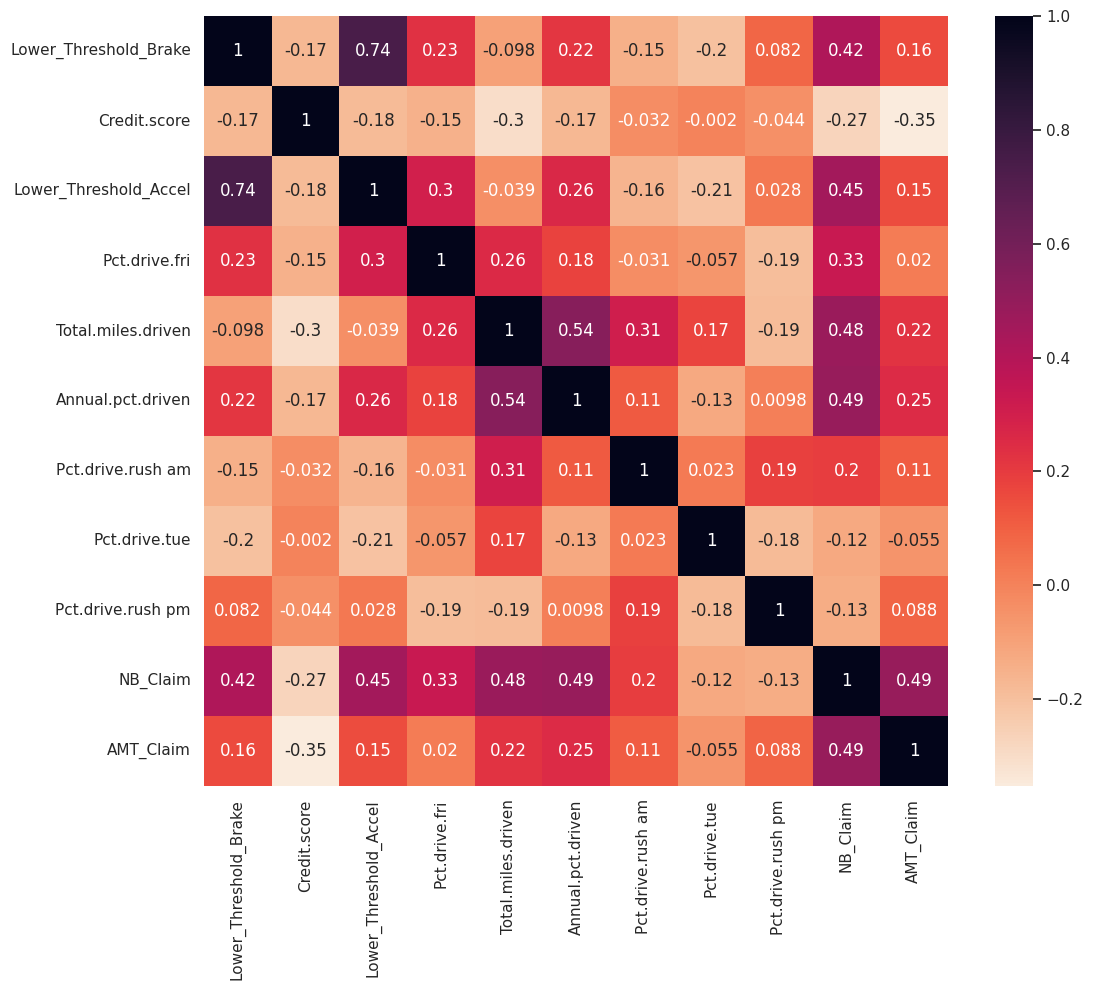

In [ ]:
corr_matrix = heat_data.corr()

# Create heatmap using Seaborn
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='rocket_r', annot=True, ax=ax)


In [ ]:
plt.savefig('heatmap.png')

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
df_cleaned

Lower_Threshold_Brake  Credit.score  Lower_Threshold_Accel  \
0                   0.123457      0.838912               0.020934   
1                   0.206656      0.794979               0.163178   
2                   0.014493      0.979079               0.002684   
4                   0.046699      0.815900               0.009125   
5                   0.009125      0.694561               0.000537   
...                      ...           ...                    ...   
97863               0.031133      0.665272               0.021471   
97864               0.118089      0.730126               0.071390   
97865               0.163714      0.709205               0.101449   
97866               0.159957      0.707113               0.099302   
97867               0.157810      0.709205               0.098229   

       Pct.drive.fri  Total.miles.driven  Annual.pct.driven  \
0           0.162775            0.093536           0.342466   
1           0.183587            0.013023           0.123288   
2           0.191041            0.034646           0.778082   
4           0.180347            0.031991           0.090411   
5           0.125862            0.012491           0.098630   
...              ...                 ...                ...   
97863       0.221511            0.603476           0.834249   
97864       0.203561            0.206608           0.876209   
97865       0.223992            0.168665           0.925260   
97866       0.225371            0.189940           0.923781   
97867       0.223674            0.186553           0.920982   

       Pct.drive.rush am  Pct.drive.tue  Pct.drive.rush pm  NB_Claim  \
0               0.155380       0.152996           0.077259         0   
1               0.141168       0.153800           0.123533         0   
2               0.119942       0.207741           0.030022         0   
4               0.131098       0.188662           0.059880         0   
5               0.048163       0.154846           0.047808         0   
...                  ...            ...                ...       ...   
97863           0.153574       0.176213           0.055712         3   
97864           0.122116       0.130107           0.131751         3   
97865           0.074167       0.127404           0.129800         3   
97866           0.075006       0.129907           0.125550         3   
97867           0.077871       0.129395           0.126841         3   

         AMT_Claim  
0         0.000000  
1         0.000000  
2         0.000000  
4         0.000000  
5         0.000000  
...            ...  
97863  4118.986575  
97864  3970.262794  
97865  3177.782790  
97866  3073.215122  
97867  2706.402067  

[88644 rows x 11 columns]

# Train Test and Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target variable (y)
X_train =df_cleaned.drop(['AMT_Claim'], axis=1)
y_train = df_cleaned['AMT_Claim']

# Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Evaluation Metrics

In [ ]:
X_train.shape

(88644, 10)

In [ ]:
# df1_cleaned.drop(columns=['Driving_Class'],inplace=True)
# df_cleaned.drop(columns=['Driving_Class'],inplace=True)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
subset_size = 17000  # specify the size of the subset you want

sample = df1_cleaned.sample(n=subset_size, random_state=42)  # randomly sample 'subset_size' number of rows
X_test =sample.drop(['AMT_Claim'], axis=1)
y_test = sample['AMT_Claim']

In [ ]:
y_test

91372    0.0
29835    0.0
56590    0.0
65733    0.0
88939    0.0
        ... 
45247    0.0
15121    0.0
27894    0.0
40441    0.0
21772    0.0
Name: AMT_Claim, Length: 17000, dtype: float64

In [ ]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
  print(f"Mean Squared error is: {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor1.predict(X_test)
y_pred

array([ 458.14080077,  710.99462122,  875.43306928, ..., -782.49318682,
        901.0198776 , 3810.88260055])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 1077.2557782988306
Mean Squared error is: 1964276.7599442396
Root Mean Square error is: 1401.526581961341
R2 score is: -22.679653491793175


# Regression with these features

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressorsf = LinearRegression()
regressorsf.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressorsf.predict(X_test)
y_pred

array([ 458.14080077,  710.99462122,  875.43306928, ..., -782.49318682,
        901.0198776 , 3810.88260055])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 1077.2557782988306
Mean Squared error is: 1964276.7599442396
Root Mean Square error is: 1401.526581961341
R2 score is: -22.679653491793175


### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# X = df_cleaned.loc[:, select_features]
# y = df_cleaned.loc[:, target]

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Decision Tree Regression
# # Create decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
Emetrics(y_test, y_pred)

Mean Absoulute error is : 31.990184211832855
Mean Squared error is: 150653.50991055815
Root Mean Square error is: 388.14109536424786
R2 score is: -0.8161508524418499


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# X = df_cleaned.loc[:, select_features]
# y = df_cleaned.loc[:, target]


# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)


In [ ]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 26.367384622614576
Mean Squared error is: 45859.30965292895
Root Mean Square error is: 214.14786866305474
R2 score is: 0.44715908465717935


## Xgboost Regression

In [ ]:
from xgboost import XGBRegressor

# # Load the dataset
# X = df_cleaned.loc[:, select_features]
# y = df_cleaned.loc[:, target]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X/, y, test_size=0.4, random_state=123)

# Create the XGBoost regression model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)


Mean Absoulute error is : 277.35347327505053
Mean Squared error is: 213835.4271114507
Root Mean Square error is: 462.4234283764726
R2 score is: -1.5778184222942642


## GBM Regressor

In [ ]:
# Gradient Boosting Machine (GBM) Regression
# Load the dataset
# X = df_cleaned.loc[:, select_features]
# y = df_cleaned.loc[:, target]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)



Mean Absoulute error is : 243.2782964978476
Mean Squared error is: 179437.9103262442
Root Mean Square error is: 423.60112172448765
R2 score is: -1.1631511538819699


## KNN Regressor

In [ ]:
# K-Nearest Neighbors (KNN) Regression


# Gradient Boosting Machine (GBM) Regression
# Load the dataset
# X = df_cleaned.loc[:, select_features]
# y = df_cleaned.loc[:, target]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 3.760427994915757
Mean Squared error is: 6584.643966569413
Root Mean Square error is: 81.14581915643845
R2 score is: 0.9206211208752394


In [ ]:
import statsmodels.api as sm
import numpy as np

# Generate some sample data

# Fit GLM (Logistic Regression) model
glm_model = sm.GLM(y_train, sm.add_constant(X_train))
glm_results = glm_model.fit()

# Print model summary
print(glm_results.summary())

# Get predictions
predictions = glm_results.predict(sm.add_constant(X_test))

# Evaluate model performance (if applicable)
# For example, you can use metrics like accuracy, precision, recall, or ROC AUC score
Emetrics(y_test,predictions)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              AMT_Claim   No. Observations:                88545
Model:                            GLM   Df Residuals:                    88534
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                      6.5355e+06
Method:                          IRLS   Log-Likelihood:            -8.2039e+05
Date:                Wed, 03 Apr 2024   Deviance:                   5.7861e+11
Time:                        03:56:23   Pearson chi2:                 5.79e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4100
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6881.18

In [ ]:
glm_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Print the summary of the model
print(glm_model.summary())

predictions = glm_results.predict(sm.add_constant(X_test))

# Evaluate model performance (if applicable)
# For example, you can use metrics like accuracy, precision, recall, or ROC AUC score
Emetrics(y_test,predictions)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              AMT_Claim   No. Observations:                88545
Model:                            GLM   Df Residuals:                    88535
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2163e+08
Date:                Wed, 03 Apr 2024   Deviance:                   2.4263e+08
Time:                        03:56:24   Pearson chi2:                 5.06e+08
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Lower_Threshold_Brake    -1.07

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2  # Degree of polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

Emetrics(y_test,y_test_pred)

Mean Absoulute error is : 750.8474364906788
Mean Squared error is: 1145600.940474452
Root Mean Square error is: 1070.3274921604377
R2 score is: -12.810392640942041


In [ ]:
import pickle

In [ ]:
lr1 = 'wlinear_regression_model1.sav'
pickle.dump(regressor1, open(lr1, 'wb'))

# Save the second trained model to disk
dtr2 = 'wdecision_regression_model2.sav'
pickle.dump(dt_regressor, open(dtr2, 'wb'))

# Save the third trained model to disk
rfr3 = 'wrandomforest_regression_model3.sav'
pickle.dump(rf_regressor, open(rfr3, 'wb'))

# Save the fourth trained model to disk
xgbr4 = 'wxgboost_regression_model4.sav'
pickle.dump(model, open(xgbr4, 'wb'))

#save the fifth trained model to disk
gbmreg='wgbm_regression_model5.sav'
pickle.dump(model,open(gbmreg,'wb'))

#save the sixth trained model to disk
knnreg='knn_regression_model6.sav'geugeih
pickle.dump(model,open(knnreg,'wb'))



# Load the saved models from disk
linear_reg = pickle.load(open(lr1, 'rb'))
decisiontree_reg = pickle.load(open(dtr2, 'rb'))
randomforest_reg = pickle.load(open(rfr3, 'rb'))
xgboost_reg = pickle.load(open(xgbr4, 'rb'))
gbm_reg=pickle.load(open(gbmreg,'rb'))
knn_reg=pickle.load(open(knnreg,'rb'))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

X = ['Linear', 'Decision Tree', 'Random Forest', 'XGBoost','GBM Regressor','KNN Regressor']
MAE = [1696.865, 308.9946, 281.1744, 442.634,1006.878,221.599]
RMSE = [ 2519.959,1267.428,837.8754, 921.755,1767.471,889.066]
R2 = [ 0.3499,0.8362, 0.9284, 0.9123, 0.6778, 0.9184]

# Plot 1
fig = go.Figure([go.Bar(x=X, y=MAE, marker=dict(color='pink'))])
fig.update_layout(title='Regression Models and Mean Absolute Error', xaxis_title='Regression Model',
                  yaxis_title='Mean Absolute Error', yaxis_range=[0, 1800])
fig.update_traces(text=MAE, textposition='auto')
fig.show()

# Plot 2
fig = go.Figure([go.Bar(x=X, y=RMSE, marker=dict(color='violet'))])
fig.update_layout(title='Regression Models and Root Mean Square Error', xaxis_title='Regression Model',
                  yaxis_title='Root Mean Square Error', yaxis_range=[0, 2600 ])
fig.update_traces(text=RMSE, textposition='auto')
fig.show()

# Plot 3
fig = go.Figure([go.Bar(x=X, y=R2, marker=dict(color='maroon'))])
fig.update_layout(title='Regression Models and R2-score', xaxis_title='Regression Model',
                  yaxis_title='R2-score', yaxis_range=[0.3, 1])
fig.update_traces(text=R2, textposition='auto')
fig.show()


Taking user given input and predicting the price of the claim amount

# We will use random forest model for our prediction for it has better performance

In [ ]:
df_resampled.head(5)

In [ ]:
df_cleaned.head(5)

In [ ]:
select_features

In [ ]:
columns_to_scale

In [ ]:
# For column 'Lower_Threshold_Brake'
min_brake = df_resampled['Lower_Threshold_Brake'].min()
max_brake = df_resampled['Lower_Threshold_Brake'].max()

# For column 'Credit.score'
min_cr_score = df_resampled['Credit.score'].min()
max_cr_score = df_resampled['Credit.score'].max()

# For column 'Lower_Threshold_Accel'
min_accl = df_resampled['Lower_Threshold_Brake'].min()
max_accl = df_resampled['Lower_Threshold_Brake'].max()

# For column 'Pct.drive.fri'
min_drivein = df_resampled['Pct.drive.fri'].min()
max_drivein = df_resampled['Pct.drive.fri'].max()

# For column 'Total.miles.driven'
min_miles = df_resampled['Total.miles.driven'].min()
max_miles = df_resampled['Total.miles.driven'].max()

In [ ]:
df_cleaned.head(5)

In [ ]:
select_features

In [ ]:
# user inputs section

def user_inputs():
  print("-------------------Hi User, Enter the Following Details----------------")
  nb_claim = int(input(f'Enter the number of claims = '))
  credit_score = float(input(f'Enter the credit score = '))
  pct_drive_fri = float(input(f'Enter the Percentage drive in friday (in %) = ')) / 100
  pct_drive_pm = float(input(f'Enter the Percentage drive Rush in PM (in %) = ')) / 100
  lower_accl_thr = int(input(f'Enter the Lower Acceleration threshold = '))
  total_miles = float(input(f'Enter the total miles driven = '))
  lower_brake_thr = int(input(f'Enter the Lower brake threshold = '))
  pct_drive_am = float(input(f'Enter the Percentage drive Rush in AM (in %) = ')) / 100
  annual_percentage = float(input(f'Enter the Annual Percentage Driven (in %) = ')) / 100
  pct_drive_true = float(input(f'Enter the Percentage drive True = ')) / 100

  # scaling function
  low_brake_scaled = (lower_brake_thr -  min_brake)/(max_brake - min_brake)
  credit_score_scaled = (credit_score - min_cr_score)/(max_cr_score - min_cr_score)
  lower_accl_thr_scaled = (lower_accl_thr - min_accl)/(max_accl - min_accl)
  pct_drive_fri_scaled = (pct_drive_fri - min_drivein)/(max_drivein - min_drivein)
  total_miles_scaled = (total_miles - min_miles)/(max_miles - min_miles)
  return [nb_claim,credit_score_scaled,pct_drive_fri_scaled,pct_drive_pm,lower_accl_thr_scaled,total_miles_scaled,low_brake_scaled,pct_drive_am,annual_percentage,pct_drive_true]

In [ ]:
input_to_model = user_inputs()

In [ ]:
input_to_model

# Output

In [ ]:
y_pred_rf = randomforest_reg.predict(np.array(input_to_model).reshape(1, -1))

In [ ]:
print(f"The predicted amount claimed is : {y_pred_rf[0]}")

# Rating Variable

In [ ]:
print(f"The rating variable value for the amount claimed for the given input is  : {y_pred_rf[0] / mean_claim_amount}")